In [ ]:
# Purpose of the code:
    # Play around with the dataset (FeatureDay) 
    # Generate some preliminary plots
    # Plot scatter plots to track change of features over days of study
    # plot and Fit regression lines to feature values over days of study

In [1]:
# necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
from scipy.stats import pearsonr, betai
%matplotlib inline

In [2]:
# switch to the proper directory to access the data 
pwd

'/camhpc/home/nhassanp/jupyter-notebook-dir'

In [3]:
cd /camdatalake/bronze/verily_ms/device/

/camdatalake/bronze/verily_ms/device


In [4]:
pwd

'/camdatalake/bronze/verily_ms/device'

In [5]:
# check the content of the directory
ls

FeaturesDay.csv.gz                 FeatureStudy_free_living_related
FeaturesStudy.csv.gz               FeatureStudy_model_related
FeatureStudy_at_home_related       FeatureStudy_MSFC_composite_related
FeatureStudy_clinical_1_related    FeatureStudy_MSFC_related
FeatureStudy_clinical_2_related    FeatureStudy_patient_info_related
FeatureStudy_clinical_3_related    GMSSMDEVICEANDCLINICALDATASUMMARY.pdf
FeatureStudy_clinical_related      GMSSMDEVICEANDCLINICALDATASUMMARY.txt
FeatureStudy_demographics_related  GMSSMEXPECTEDMISSINGDATA.pdf


In [6]:
# download and read the data

# FeatureDay: Average value of the features for each day of study. Days are listed as 
# DayOfStudy

# FeatureStudy: Features for the entire study period.For the at home features, 
# the reported value is the median of the observed day level values.

import gzip, csv
with gzip.open("FeaturesDay.csv.gz", "rt", newline="") as file:
    FeatureDay = pd.read_csv(file, header = 0)

with gzip.open("FeaturesStudy.csv.gz", "rt", newline="") as file:
    FeatureStudy = pd.read_csv(file, header = 0)

In [7]:
# explore the dataset
FeatureDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Columns: 217 entries, user_email to demographic_model_error_3
dtypes: float64(212), int64(3), object(2)
memory usage: 2.5+ MB


In [8]:
FeatureDay.describe()

/opt/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


msfc_walk_composite_1  msfc_9hpt_composite_1  msfc_sdmt_composite_1  \
count            1532.000000            1532.000000            1532.000000   
mean               -0.019921               0.090237               0.144536   
std                 1.003682               0.953135               0.862097   
min                -3.221528              -1.886624              -2.159982   
25%                -0.256647              -0.645806              -0.411009   
50%                 0.299268               0.104155               0.135545   
75%                 0.669878               0.940655               0.900721   
max                 0.924672               1.897517               1.939174   

       msfc_snellen_composite_1  msfc_composite_1  \
count               1532.000000       1532.000000   
mean                   0.039580          0.063608   
std                    1.015171          0.763705   
min                   -2.556372         -1.373281   
25%                   -0.416552         -0.398860   
50%                    0.296722          0.345561   
75%                    1.295305          0.642663   
max                    1.295305          1.137124   

       msfc_walk_composite_residual_1  msfc_9hpt_composite_residual_1  \
count                     1532.000000                     1532.000000   
mean                        -0.080672                        0.030814   
std                          0.820543                        0.894932   
min                         -3.038226                       -1.545838   
25%                         -0.201410                       -0.680438   
50%                          0.038386                        0.180416   
75%                          0.301486                        0.790244   
max                          1.463065                        1.543403   

       msfc_sdmt_composite_residual_1  msfc_snellen_composite_residual_1  \
count                     1532.000000                        1532.000000   
mean                         0.128497                          -0.036285   
std                          0.785066                           1.075377   
min                         -1.801496                          -2.351975   
25%                         -0.321350                          -0.802429   
50%                          0.138712                          -0.257036   
75%                          0.656998                           0.807599   
max                          2.247295                           1.817092   

       msfc_walk_composite_2            ...              \
count            1530.000000            ...               
mean                0.039871            ...               
std                 0.776117            ...               
min                -2.248677            ...               
25%                      NaN            ...               
50%                      NaN            ...               
75%                      NaN            ...               
max                 0.924672            ...               

       hourly_temp_median_at_home  hourly_temp_std_at_home  \
count                 1285.000000              1285.000000   
mean                    29.650973                 0.726677   
std                      2.929483                 0.786577   
min                     16.700000                 0.000000   
25%                           NaN                      NaN   
50%                           NaN                      NaN   
75%                           NaN                      NaN   
max                     33.600000                 6.860394   

       hourly_temp_range_at_home  hourly_amb_temp_median_at_home  \
count               1.285000e+03                     1285.000000   
mean                1.766848e+00                       25.396385   
std                 1.732030e+00                        2.653647   
min                -3.552714e-15                       16.185000   
25%                          NaN                    

In [9]:
FeatureDay.head()

user_email gls_subject_code  msfc_walk_composite_1  \
0  gmssm001@glsstudykit.com          H800001              -0.187158   
1  gmssm001@glsstudykit.com          H800001              -0.187158   
2  gmssm001@glsstudykit.com          H800001              -0.187158   
3  gmssm001@glsstudykit.com          H800001              -0.187158   
4  gmssm001@glsstudykit.com          H800001              -0.187158   

   msfc_9hpt_composite_1  msfc_sdmt_composite_1  msfc_snellen_composite_1  \
0              -1.886624              -1.285495                 -1.486462   
1              -1.886624              -1.285495                 -1.486462   
2              -1.886624              -1.285495                 -1.486462   
3              -1.886624              -1.285495                 -1.486462   
4              -1.886624              -1.285495                 -1.486462   

   msfc_composite_1  msfc_walk_composite_residual_1  \
0         -1.211435                        1.035492   
1         -1.211435                        1.035492   
2         -1.211435                        1.035492   
3         -1.211435                        1.035492   
4         -1.211435                        1.035492   

   msfc_9hpt_composite_residual_1  msfc_sdmt_composite_residual_1  \
0                       -1.545838                        0.138712   
1                       -1.545838                        0.138712   
2                       -1.545838                        0.138712   
3                       -1.545838                        0.138712   
4                       -1.545838                        0.138712   

             ...              hourly_temp_median_at_home  \
0            ...                                   32.70   
1            ...                                   32.85   
2            ...                                   31.60   
3            ...                                   30.75   
4            ...                                   30.65   

   hourly_temp_std_at_home  hourly_temp_range_at_home  \
0                 0.760989                      1.905   
1                 0.532629                      1.350   
2                 0.717705                      1.800   
3                 1.689474                      5.550   
4                 0.830880                      2.205   

   hourly_amb_temp_median_at_home  hourly_amb_temp_std_at_home  \
0                         30.7575                     4.330252   
1                         29.5875                     6.815948   
2                         30.2200                     3.545528   
3                         27.3600                     4.984148   
4                         30.6825                     4.699070   

   hourly_amb_temp_range_at_home   prv_sdnn  demographic_model_error_1  \
0                        11.7550  26.824533                  -0.924262   
1                        15.8120  24.795007                  -0.924262   
2                         7.3300  28.387662                  -0.924262   
3                        13.5820  31.598062                  -0.924262   
4                        13.8555  23.523694                  -0.924262   

   demographic_model_error_2  demographic_model_error_3  
0                   -1.03338                  -1.525646  
1                   -1.03338                  -1.525646  
2                   -1.03338                  -1.525646  
3                   -1.03338                  -1.525646  
4                   -1.03338                  -1.525646  

[5 rows x 217 columns]

In [10]:
# extract name of features 
list(FeatureDay.columns)

['user_email',
 'gls_subject_code',
 'msfc_walk_composite_1',
 'msfc_9hpt_composite_1',
 'msfc_sdmt_composite_1',
 'msfc_snellen_composite_1',
 'msfc_composite_1',
 'msfc_walk_composite_residual_1',
 'msfc_9hpt_composite_residual_1',
 'msfc_sdmt_composite_residual_1',
 'msfc_snellen_composite_residual_1',
 'msfc_walk_composite_2',
 'msfc_9hpt_composite_2',
 'msfc_sdmt_composite_2',
 'msfc_snellen_composite_2',
 'msfc_composite_2',
 'msfc_walk_composite_residual_2',
 'msfc_9hpt_composite_residual_2',
 'msfc_sdmt_composite_residual_2',
 'msfc_snellen_composite_residual_2',
 'msfc_walk_composite_3',
 'msfc_9hpt_composite_3',
 'msfc_sdmt_composite_3',
 'msfc_snellen_composite_3',
 'msfc_composite_3',
 'msfc_walk_composite_residual_3',
 'msfc_9hpt_composite_residual_3',
 'msfc_sdmt_composite_residual_3',
 'msfc_snellen_composite_residual_3',
 'sex',
 'height_inch',
 'weight_lbs',
 'bmi',
 'age_years',
 'dayofstudy',
 'movement_rate',
 'duration_movement_count',
 'stance',
 'swing',
 'turn_a

In [13]:
# found list of unique IDs for patients
patient_IDs = list(FeatureDay['gls_subject_code'].unique())
patient_IDs

['H800001',
 'H800002',
 'H800003',
 'H800004',
 'H800006',
 'H800007',
 'H800008',
 'H800009',
 'H800010',
 'H800011',
 'H800013',
 'H800014',
 'H800016',
 'H800017',
 'H800018',
 'H800019',
 'H800020',
 'H800021',
 'H800022',
 'H800023',
 'H800024',
 'H800025',
 'H800005',
 'H800012',
 'H800015']

In [15]:
# 10 free living feature with high correlation

# ['idle_minutes',
#  'turn_vel_std_ankle',
#  'swing',
#  'stance',
#  'duration_movement_count',
#  'turn_vel_max_ankle',
#  'turn_duration_ankle',
#  'duration_rem_count',
#  'rem_percent',
#  'movement_rate']

free_living_features_highly_correlated = ['idle_minutes',
 'turn_vel_std_ankle',
 'swing',
 'stance',
 'duration_movement_count',
 'turn_vel_max_ankle',
 'turn_duration_ankle',
 'duration_rem_count',
 'rem_percent',
 'movement_rate']

In [36]:
# 19 highly correlated at home features (structured activity)

# ['mean_pvt_delay_7_at_home',
#  'mobility_stance_at_home',
#  'mean_pvt_delay_at_home',
#  'pq_nondominant_rhythm_at_home',
#  'pq_nondominant_median_at_home',
#  'pq_dominant_rhythm_at_home',
#  'turn_vel_max_at_home',
#  'mobility_swing_at_home',
#  'zx_dominant_num_correct_at_home',
#  'turn_vel_std_at_home',
#  'turn_duration_ankle_at_home',
#  'turn_vel_max_ankle_at_home',
#  'mean_pvt_delay_5_at_home',
#  'zx_nondominant_median_at_home',
#  'zx_nondominant_num_correct_at_home',
#  'mean_pvt_delay_3_at_home',
#  'turn_vel_std_ankle_at_home',
#  'mobility_activity_at_home_time',
#  'mean_pvt_delay_1_at_home']

at_home_features_highly_correlated = ['mean_pvt_delay_7_at_home',
 'mobility_stance_at_home',
 'mean_pvt_delay_at_home',
 'pq_nondominant_rhythm_at_home',
 'pq_nondominant_median_at_home',
 'pq_dominant_rhythm_at_home',
 'turn_vel_max_at_home',
 'mobility_swing_at_home',
 'zx_dominant_num_correct_at_home',
 'turn_vel_std_at_home',
 'turn_duration_ankle_at_home',
 'turn_vel_max_ankle_at_home',
 'mean_pvt_delay_5_at_home',
 'zx_nondominant_median_at_home',
 'zx_nondominant_num_correct_at_home',
 'mean_pvt_delay_3_at_home',
 'turn_vel_std_ankle_at_home',
 'mobility_activity_at_home_time',
 'mean_pvt_delay_1_at_home']

In [203]:
def remove_outliers(feature_values, day_of_study):
    # a function to remove outliers from input dataset and return filtered dataset as the ouput
    m = 1.5 # deistance thereshold from the mean
    mean = feature_values.mean()
    std = feature_values.std()
    tuples = list(zip(feature_values,day_of_study))
    filtered_values = []
    for (x,y) in tuples:
        if (x >= mean - m * std) & (x <= mean + m * std):
            filtered_values.append((x,y))
    unzip_filtered_values = list(zip(*filtered_values))
    # check for missing values
    if len(unzip_filtered_values) > 0:
        return pd.Series(list(unzip_filtered_values[0])), pd.Series(list(unzip_filtered_values[1]))
    else:
        return pd.Series([]),day_of_study

In [204]:
def standardize_axis(feature):
    # a function to standardize the axis
        # remove outliers (both feature values & associated days of study), return filtered values
        # use the filtered values to assign a range to axis
        # we assume dataframes FeatureDay and patient_IDs are already defined
    All_filtered_feature_values = []
    All_filtered_days_of_studies = []
    # loop on all the patients
    for ID in patient_IDs:
        # extract part of FeatureDay that is related to a patient and input feature 
        col_1 = feature
        col_2 = 'dayofstudy'
        df = FeatureDay[FeatureDay['gls_subject_code'] == ID][[col_1,col_2]]
        # sort the dataframe based on days of study
        df.sort(col_2, inplace = True)
        # create list of x: days of study, y: feature values
        x = df[col_2]
        y = df[col_1]
        # remove outliers (both feature values & associated days of study)
        y,x = remove_outliers(y,x)
        # store all the filtered values
        All_filtered_feature_values = All_filtered_feature_values + (pd.Series.tolist(y))
        All_filtered_days_of_studies = All_filtered_days_of_studies + (pd.Series.tolist(x))
    # set the axis ranges to the max value in the list of filtered values
    max_y = (np.max(All_filtered_feature_values))
    max_x = (np.max(All_filtered_days_of_studies))
    # return ranges for axis
    return max_y,max_x

In [205]:
def plot_feature_across_days(feature):
    # a function to plot the measurments for a specific feature vs. days
    figs, axes = plt.subplots(nrows= 5, ncols= 5,figsize=(20,20),dpi = 200)
    print(feature)
    # plot the measurments vs. days
    for idx in range(len(patient_IDs)):
        # extract the patient ID
        ID = patient_IDs[idx]
        # extract two columns as a dataframe
        col_1 = feature
        col_2 = 'dayofstudy'
        df = FeatureDay[FeatureDay['gls_subject_code'] == ID][[col_1,col_2]]
        # sort the dataframe based on days
        df.sort(col_2, inplace = True)
        x = df[col_2]
        y = df[col_1]
        # set the row and column numbers based on the fact that we have 25 patients
        row = idx // 5
        col = idx % 5
        # standardize the axis
        max_y,max_x = standardize_axis(feature)
        axes[row,col].set_xlim(0, max_x)
        axes[row,col].set_ylim(0, max_y)
        axes[row,col].set_title(ID,y=0.9)
        axes[row,col].set_xlabel('Days of Study')
        axes[row,col].set_ylabel(feature)
        # plot the measurments vs. days
        if (len(y.unique()) == 1) & (np.isnan(y.unique()).sum() == 1):
            pass
        else:
            y,x = remove_outliers(y,x)
            if len(y) == 0:
                pass
            else:
                sns.regplot(x,y,ax=axes[row,col])
                axes[row,col].set_xlabel('Days of Study')
                axes[row,col].set_ylabel(feature)

In [1]:
# distribution plot
# idle_minutes

# feature = free_living_features_highly_correlated[0]
# print(feature)
# figs, axes = plt.subplots(nrows= 5, ncols= 5,figsize=(20,20),dpi = 200)
# for idx in range(len(patient_IDs)):
#     # extract the patient ID
#     ID = patient_IDs[idx]
#     # extract two columns as a dataframe
#     col_1 = feature
#     col_2 = 'dayofstudy'
#     df = FeatureDay[FeatureDay['gls_subject_code'] == ID][[col_1,col_2]]
#     # sort the dataframe based on days
#     df.sort(col_2, inplace = True)
#     # plot the measurments vs. days
#     x = df[col_2]
#     y = df[col_1].dropna()
#     row = idx // 5
#     col = idx % 5
#     if (len(y.unique()) == 1) & (np.isnan(y.unique()).sum() == 1):
#         axes[row,col].set_title(ID,y=0.9)
#     else:
#         sns.distplot(y,ax=axes[row,col])
#         axes[row,col].set_title(ID,y=0.9)

idle_minutes


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


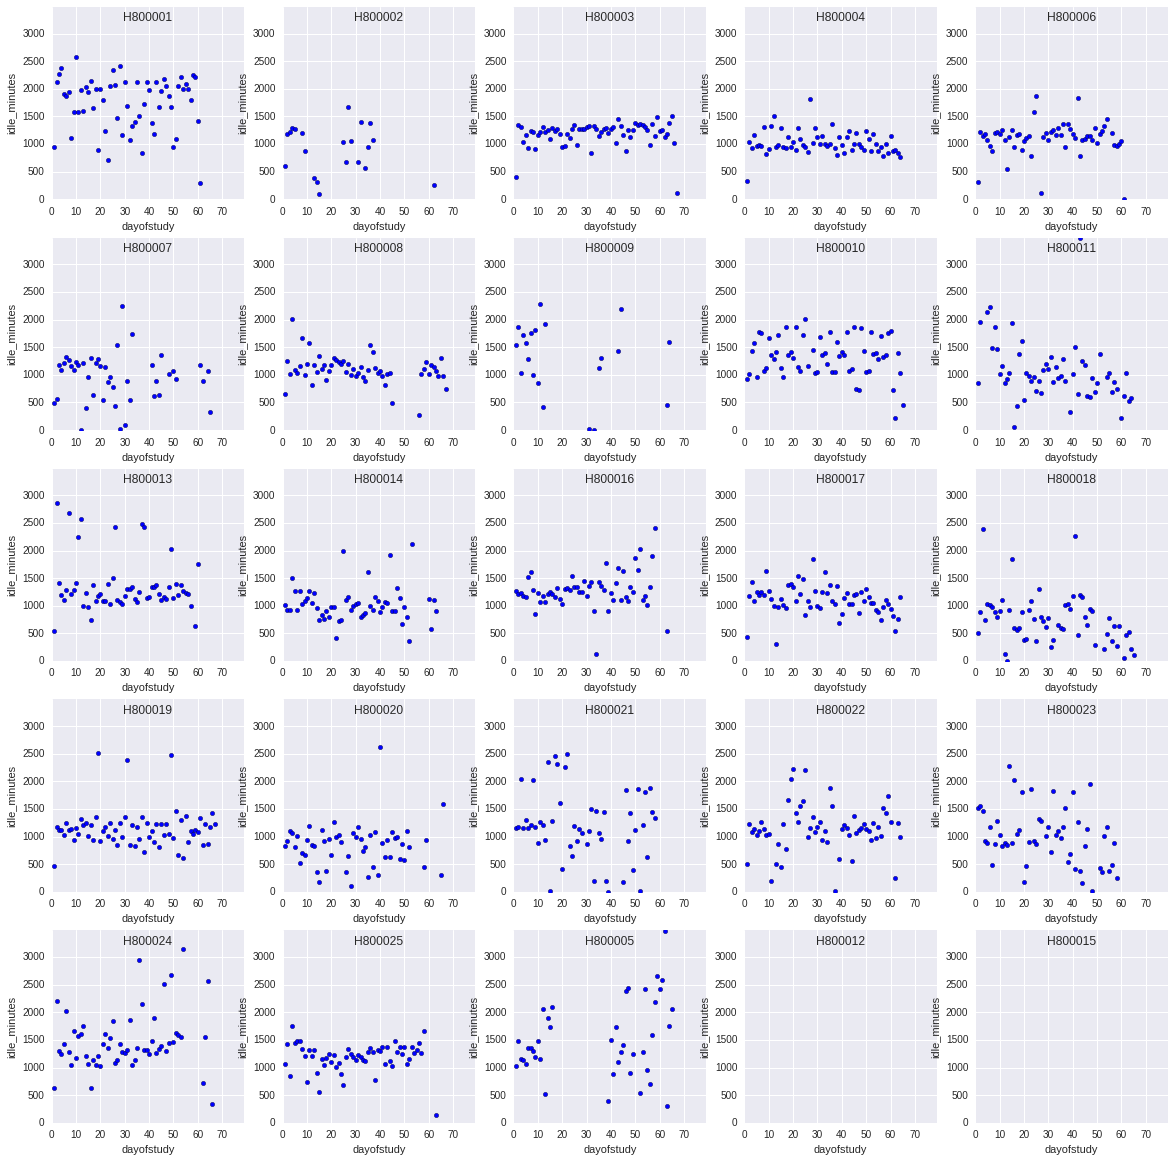

In [25]:
# scatter plots of feature values
# try on the fetaure idle_minutes
feature = free_living_features_highly_correlated[0]
print(feature)
figs, axes = plt.subplots(nrows= 5, ncols= 5,figsize=(20,20),dpi = 200)
for idx in range(len(patient_IDs)):
    # extract the patient ID
    ID = patient_IDs[idx]
    # extract two columns as a dataframe
    col_1 = feature
    col_2 = 'dayofstudy'
    df = FeatureDay[FeatureDay['gls_subject_code'] == ID][[col_1,col_2]]
    # sort the dataframe based on days
    df.sort(col_2, inplace = True)
    # plot the measurments vs. days
    x = df[col_2]
    y = df[col_1]
    
    row = idx // 5
    col = idx % 5
    
    # standardize the exis
    axes[row,col].set_xlim(0, FeatureDay[col_2].max())
    axes[row,col].set_ylim(0, FeatureDay[col_1].max())
    # plot feature values against days of study
    axes[row,col].scatter(x,y)
    axes[row,col].set_xlabel(col_2)
    axes[row,col].set_ylabel(col_1)
    axes[row,col].set_title(ID,y=0.9)
  

In [ ]:
# plot scatter plots of feature values against days of study 
# plot the regression line that can best fit to the data

idle_minutes


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


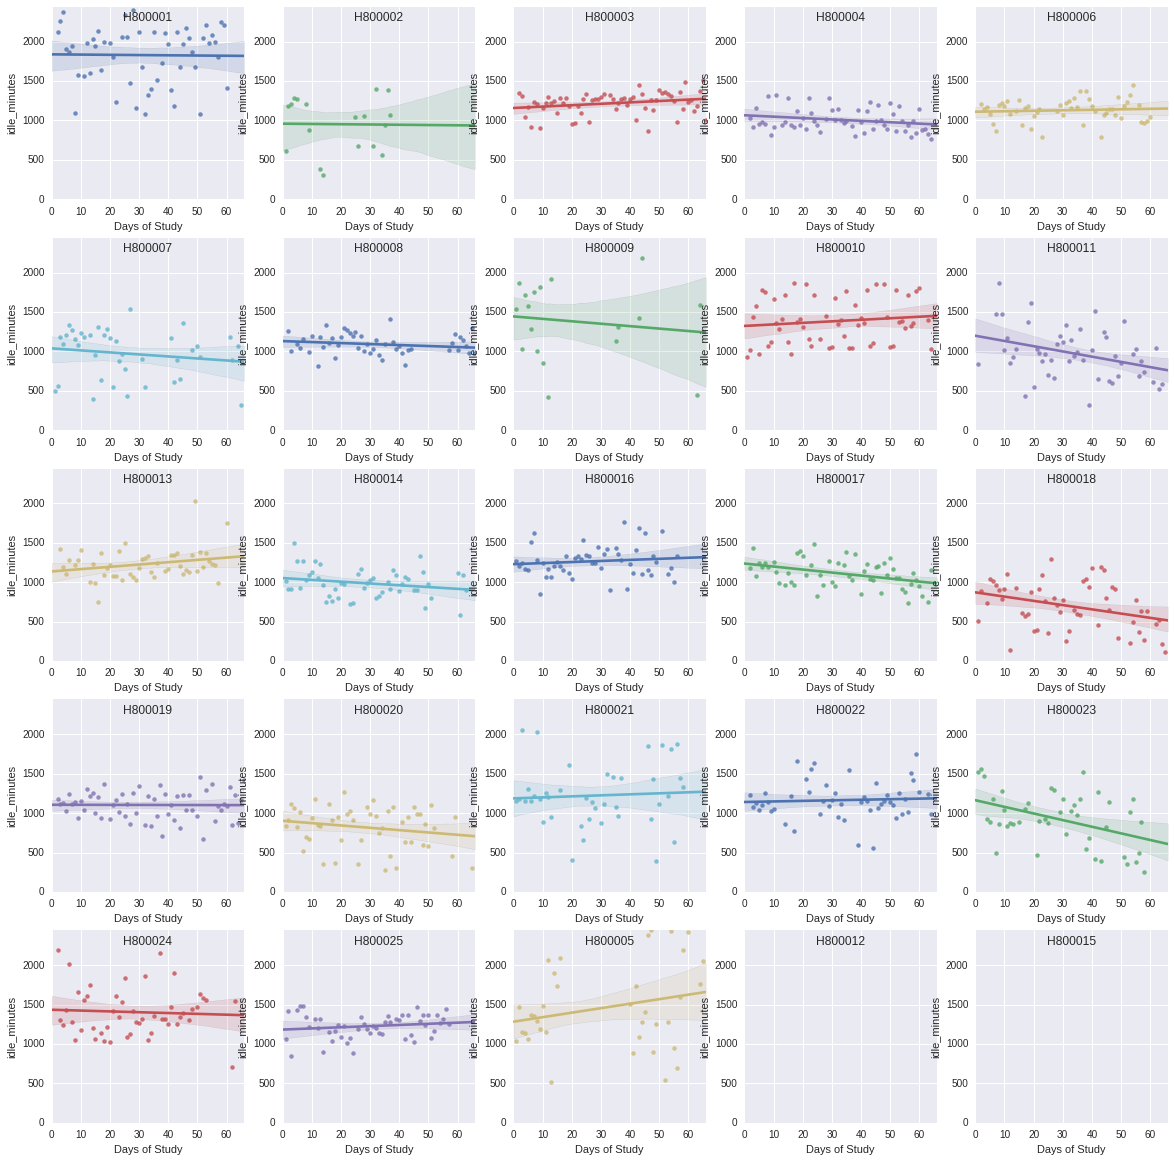

In [193]:
# idle_minutes
feature = free_living_features_highly_correlated[0]
plot_feature_across_days(feature)

turn_vel_std_ankle


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


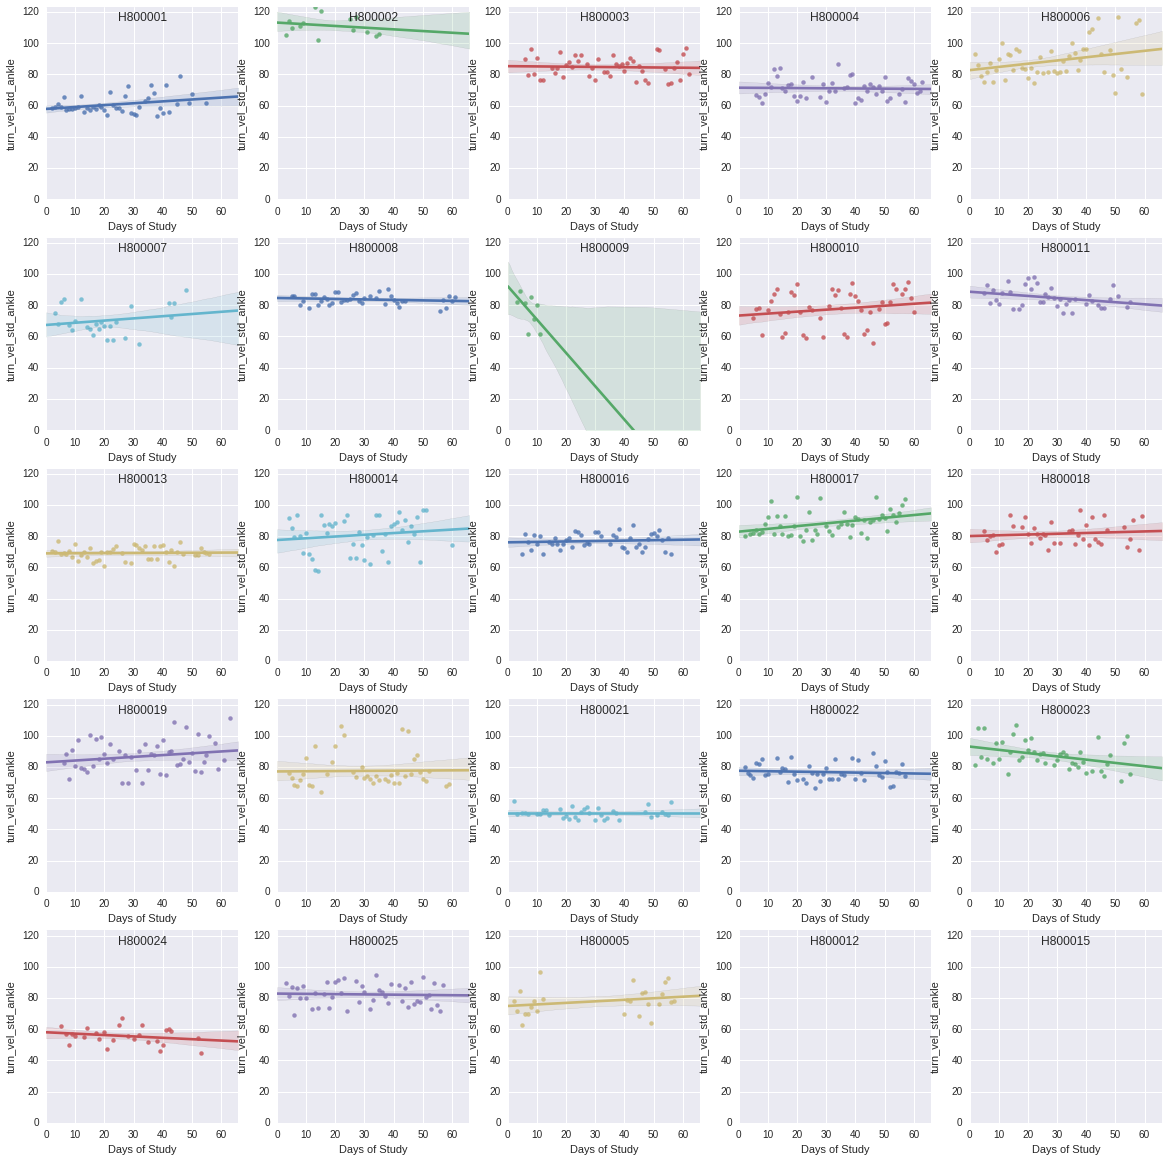

In [194]:
# turn_vel_std_ankle
feature = free_living_features_highly_correlated[1]
plot_feature_across_days(feature)

swing


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


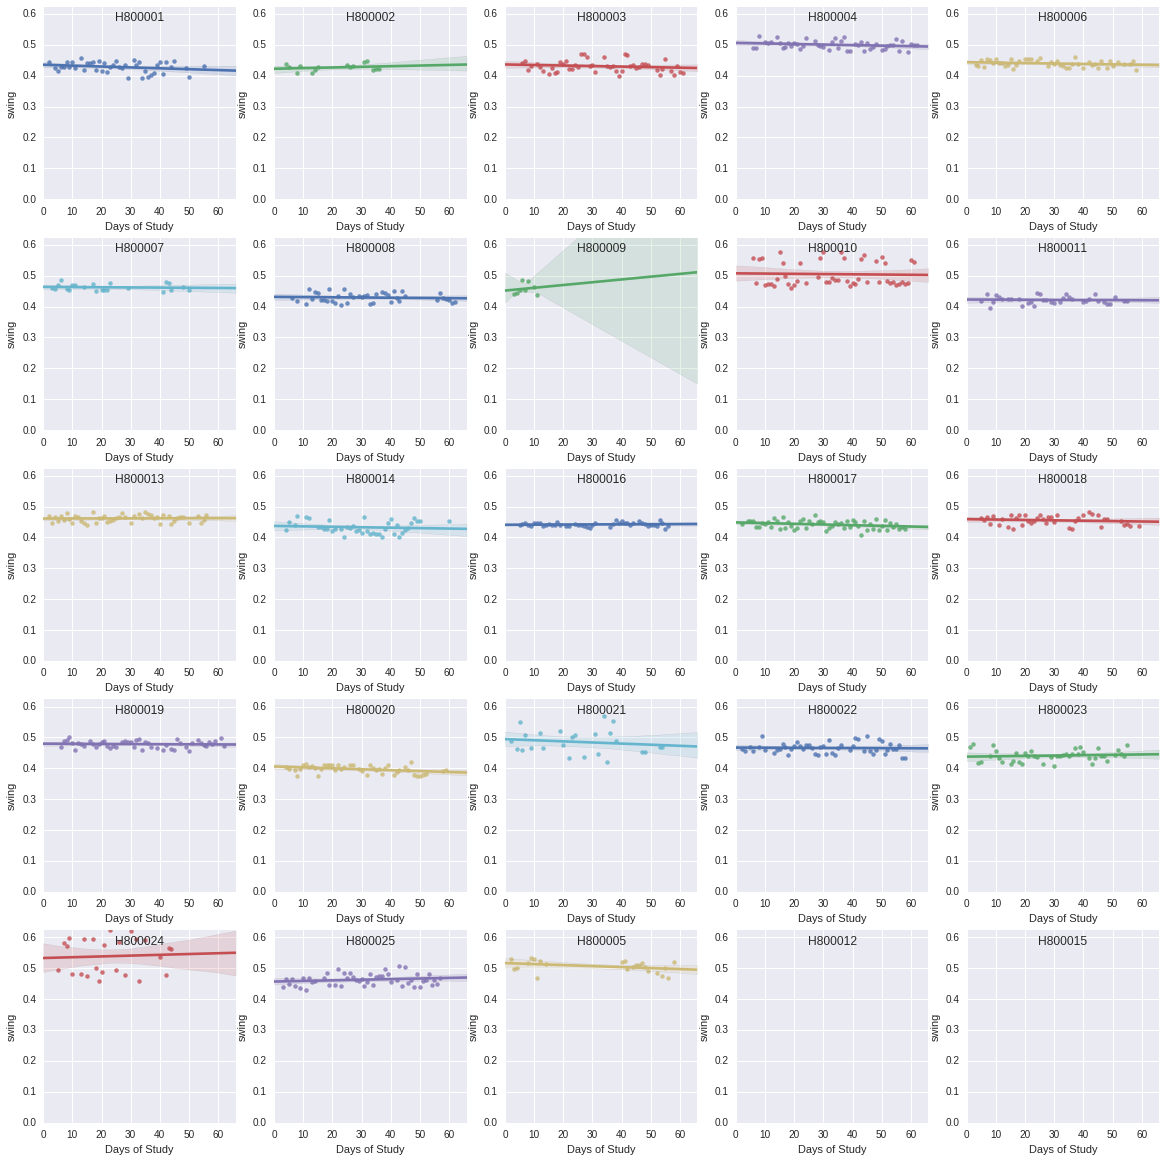

In [195]:
# swing
feature = free_living_features_highly_correlated[2]
plot_feature_across_days(feature)

stance


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


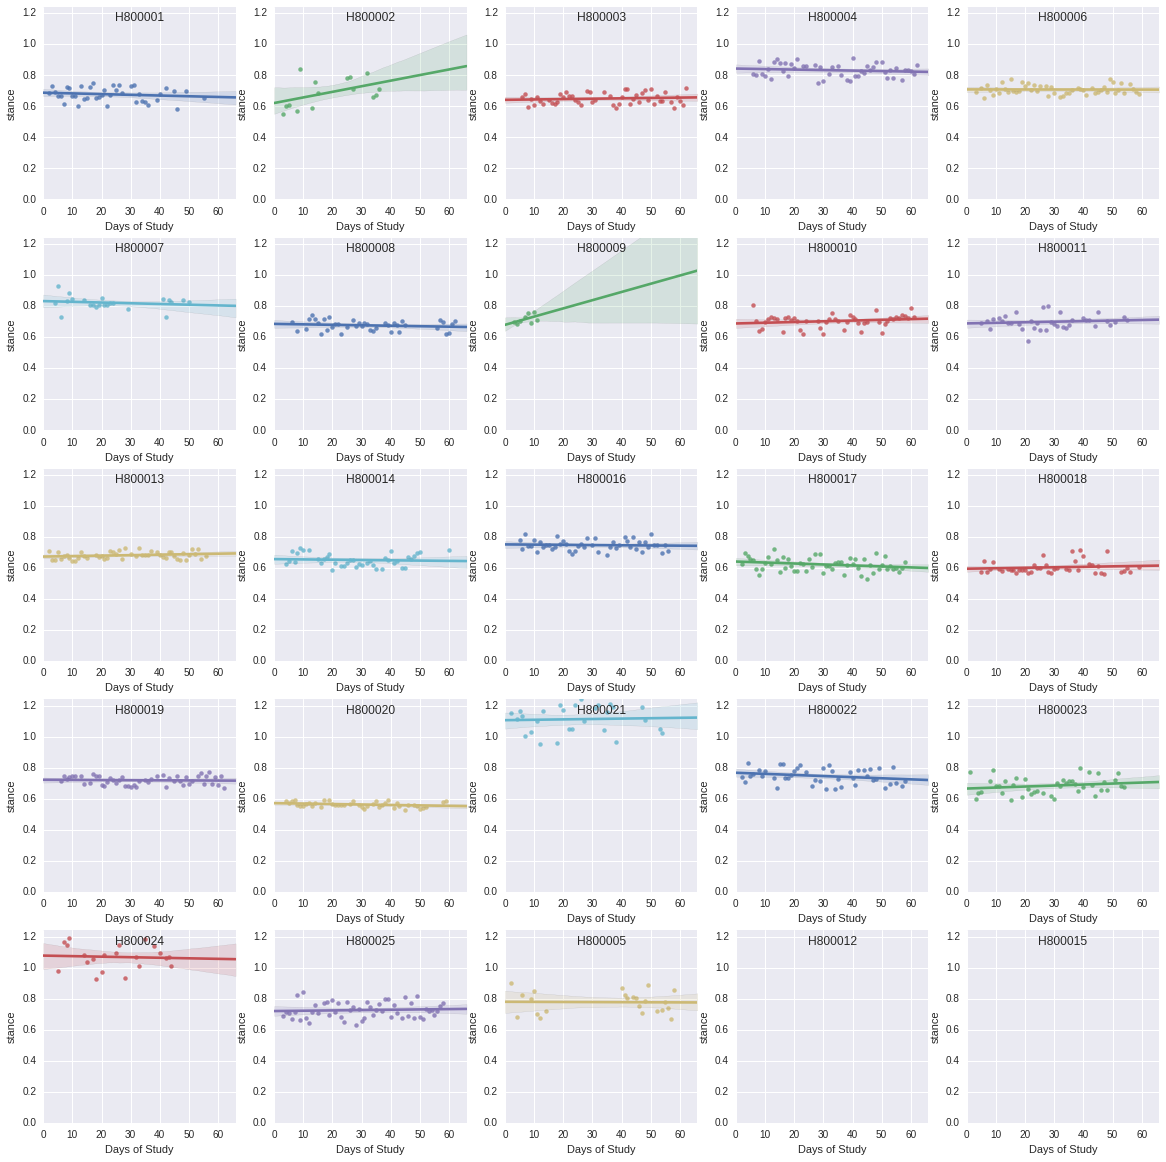

In [196]:
# stance
feature = free_living_features_highly_correlated[3]
plot_feature_across_days(feature)

duration_movement_count


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


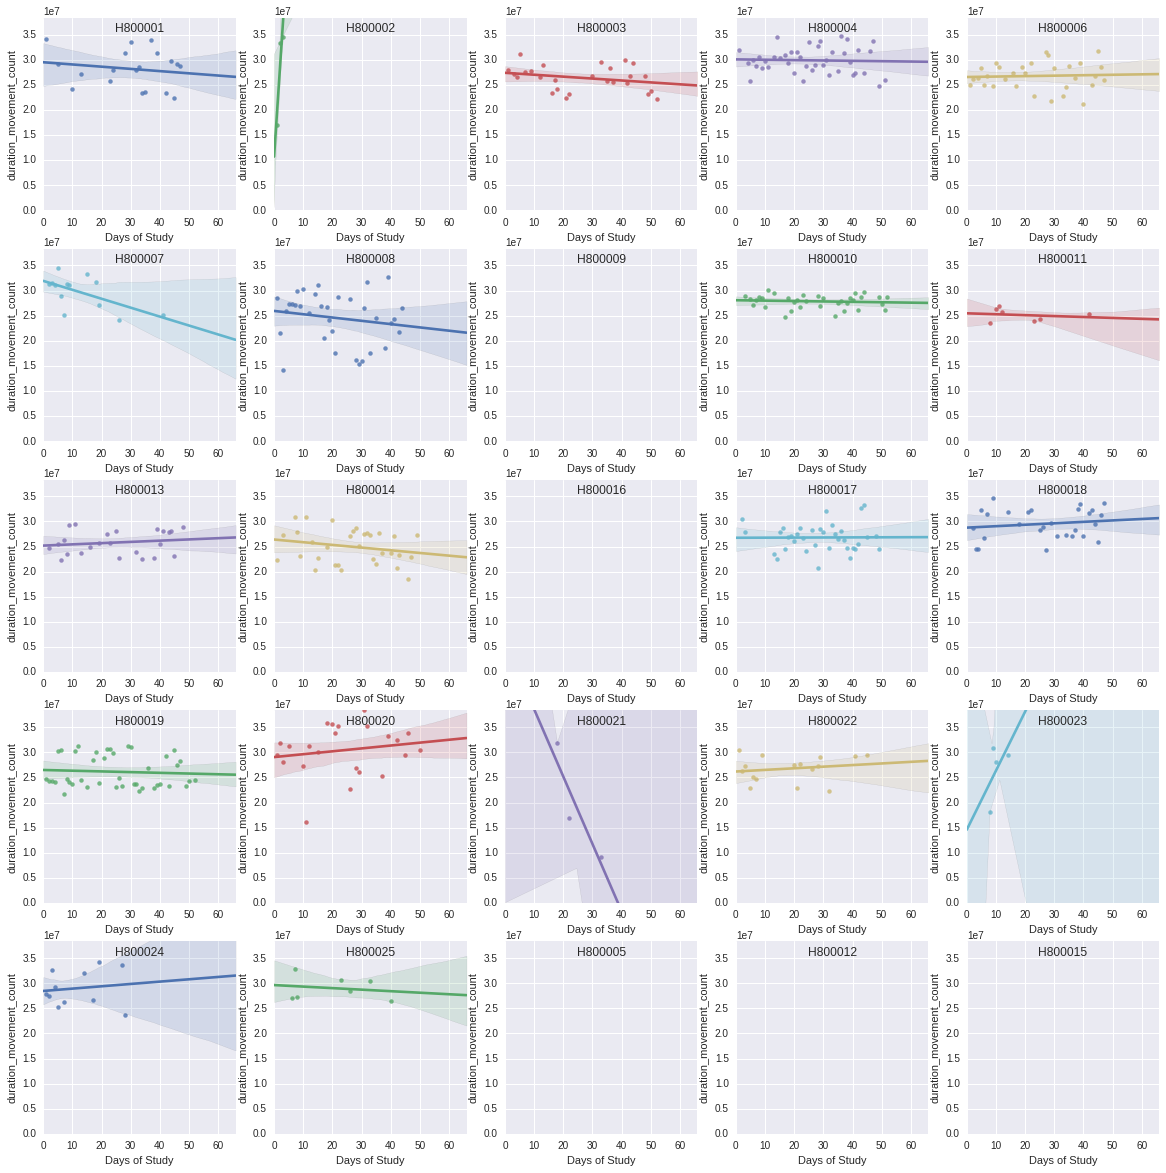

In [197]:
# duration_movement_count
feature = free_living_features_highly_correlated[4]
plot_feature_across_days(feature)

turn_vel_max_ankle


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


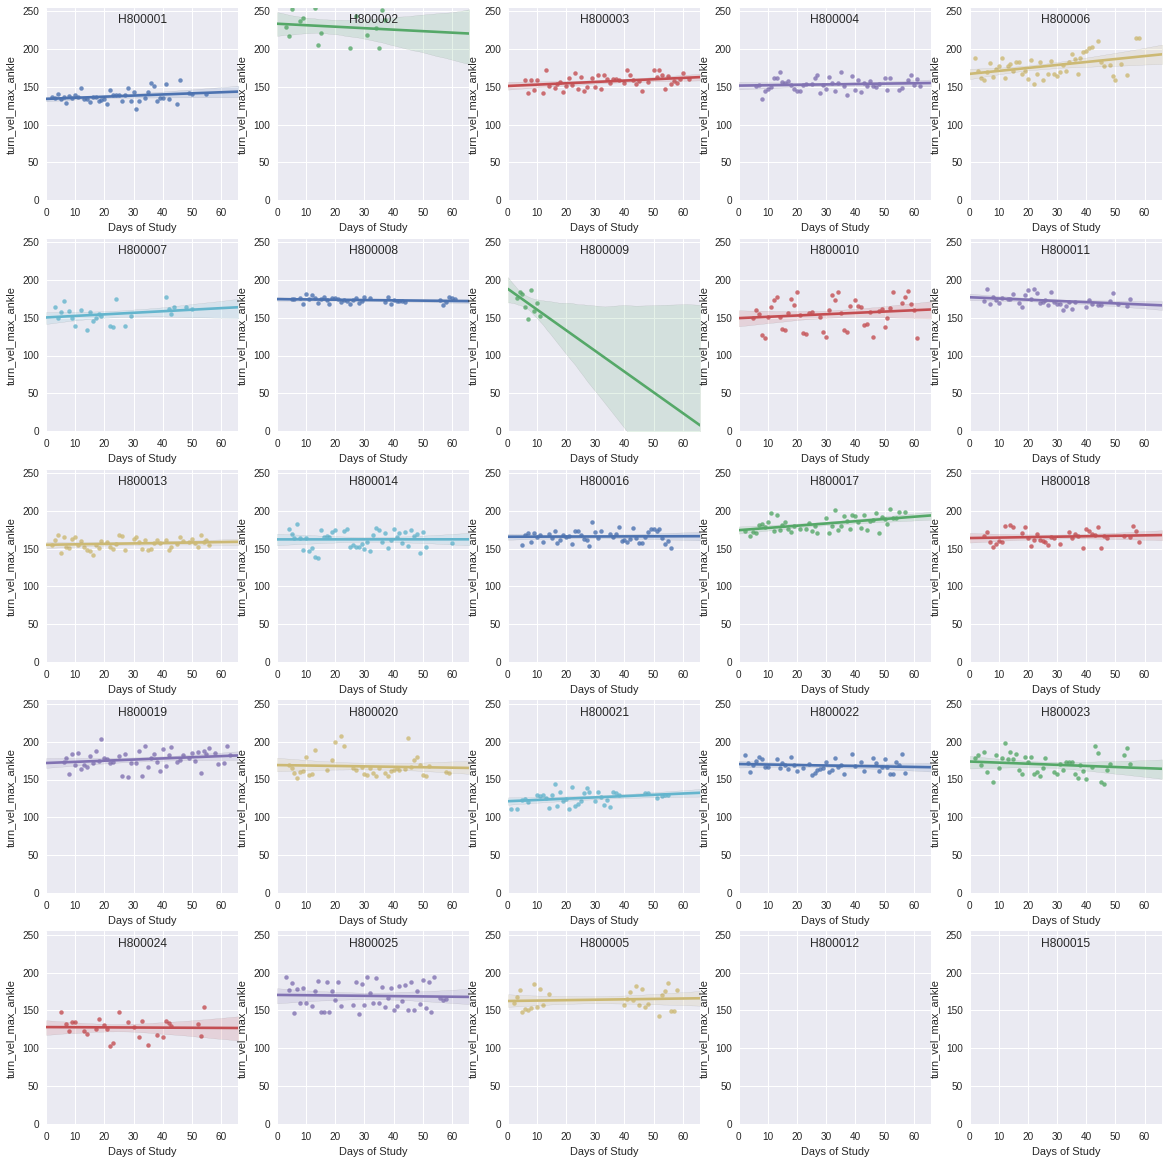

In [198]:
# turn_vel_max_ankle
feature = free_living_features_highly_correlated[5]
plot_feature_across_days(feature)

turn_duration_ankle


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


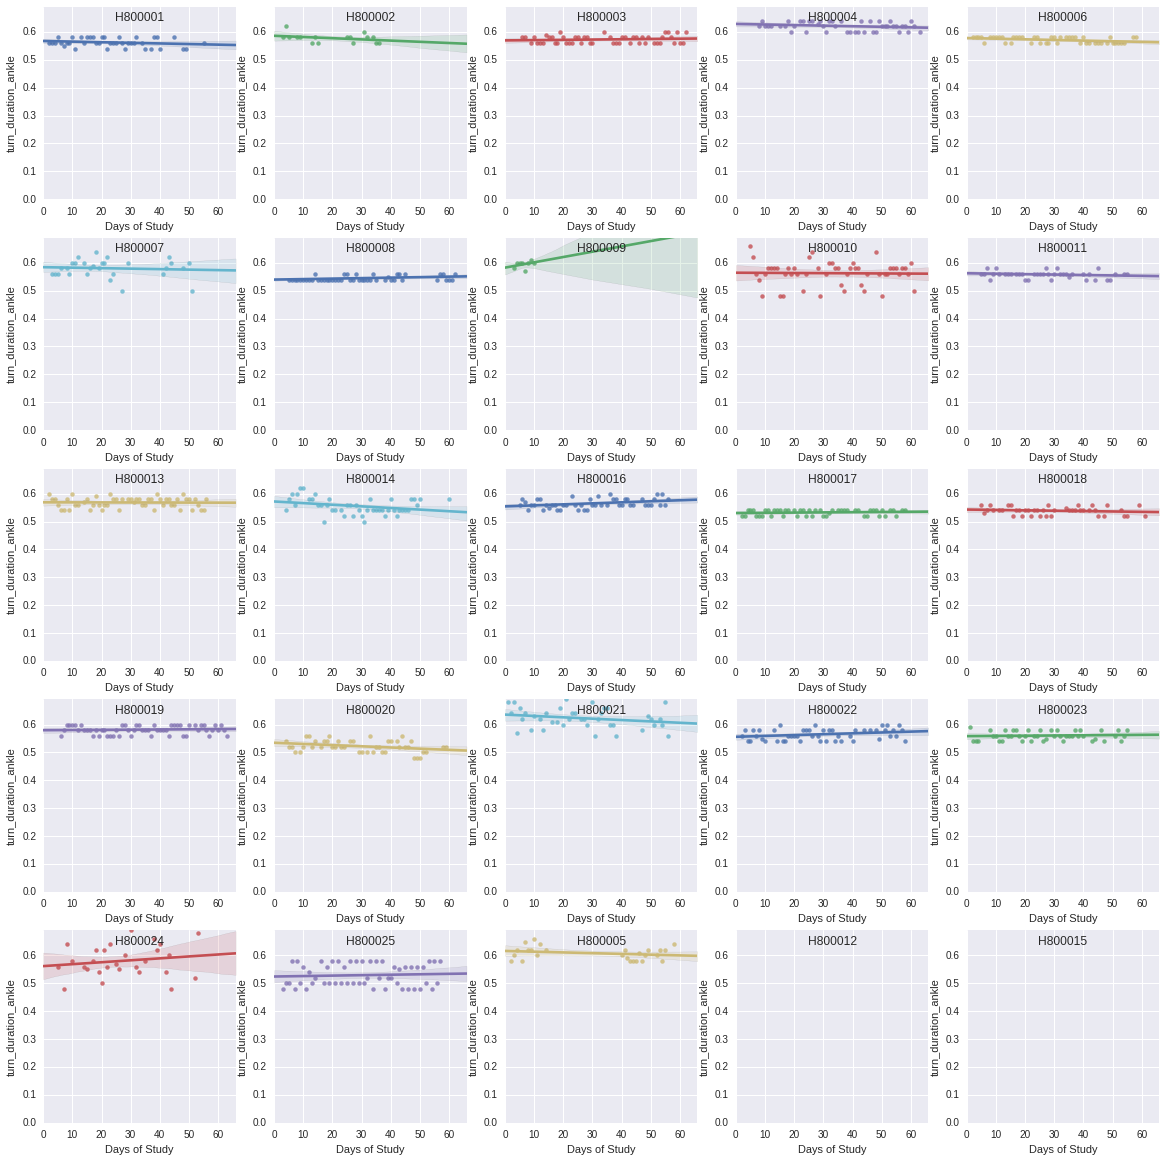

In [199]:
# turn_duration_ankle
feature = free_living_features_highly_correlated[6]
plot_feature_across_days(feature)

duration_rem_count


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


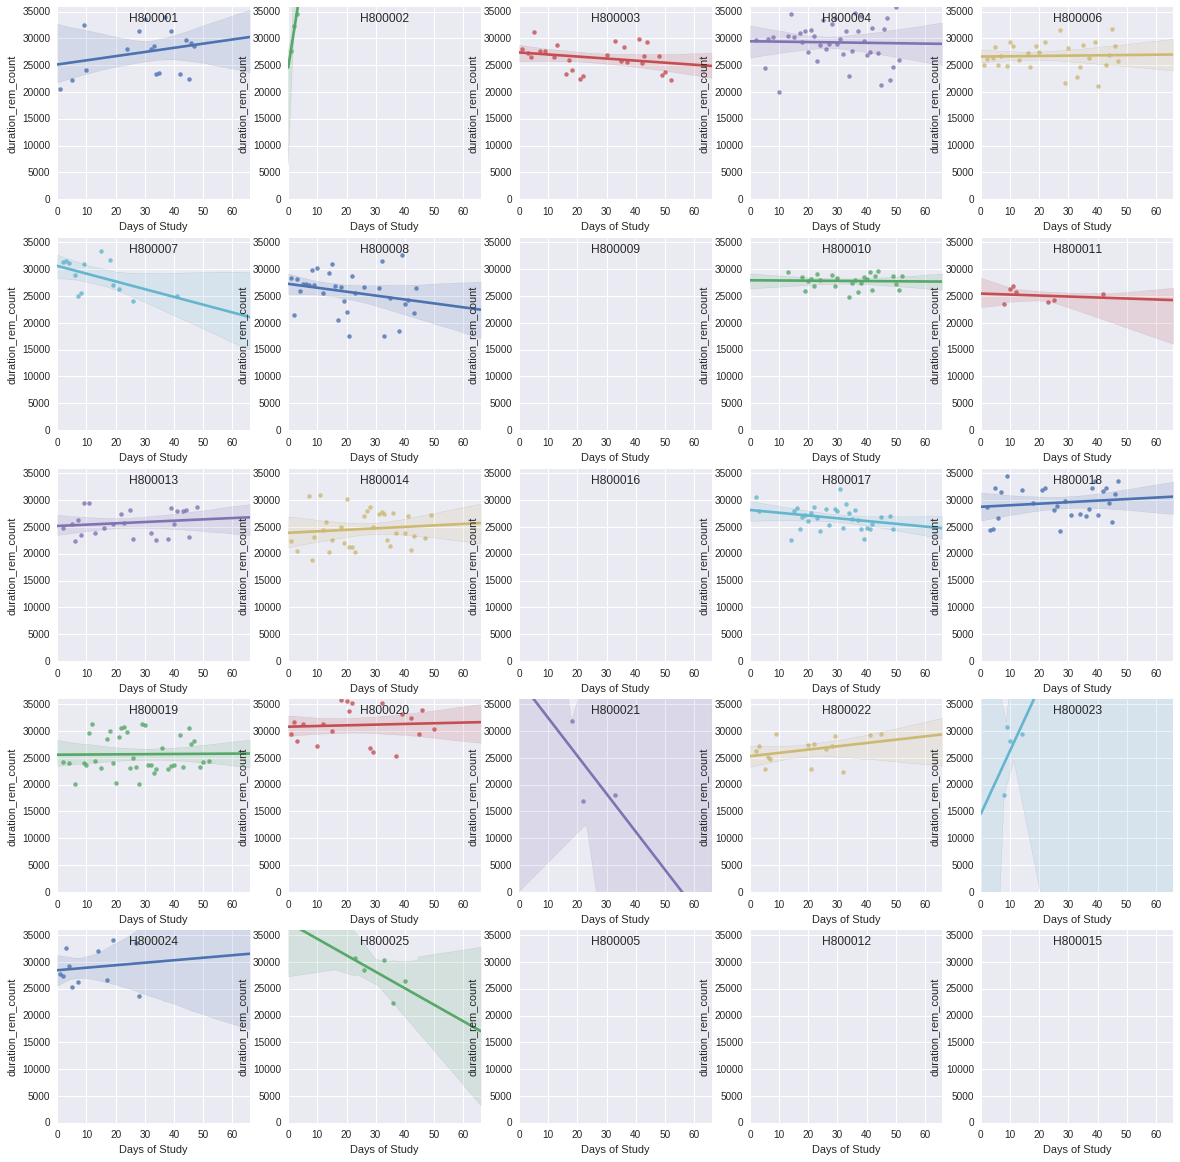

In [200]:
# duration_rem_count
feature = free_living_features_highly_correlated[7]
plot_feature_across_days(feature)

rem_percent


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


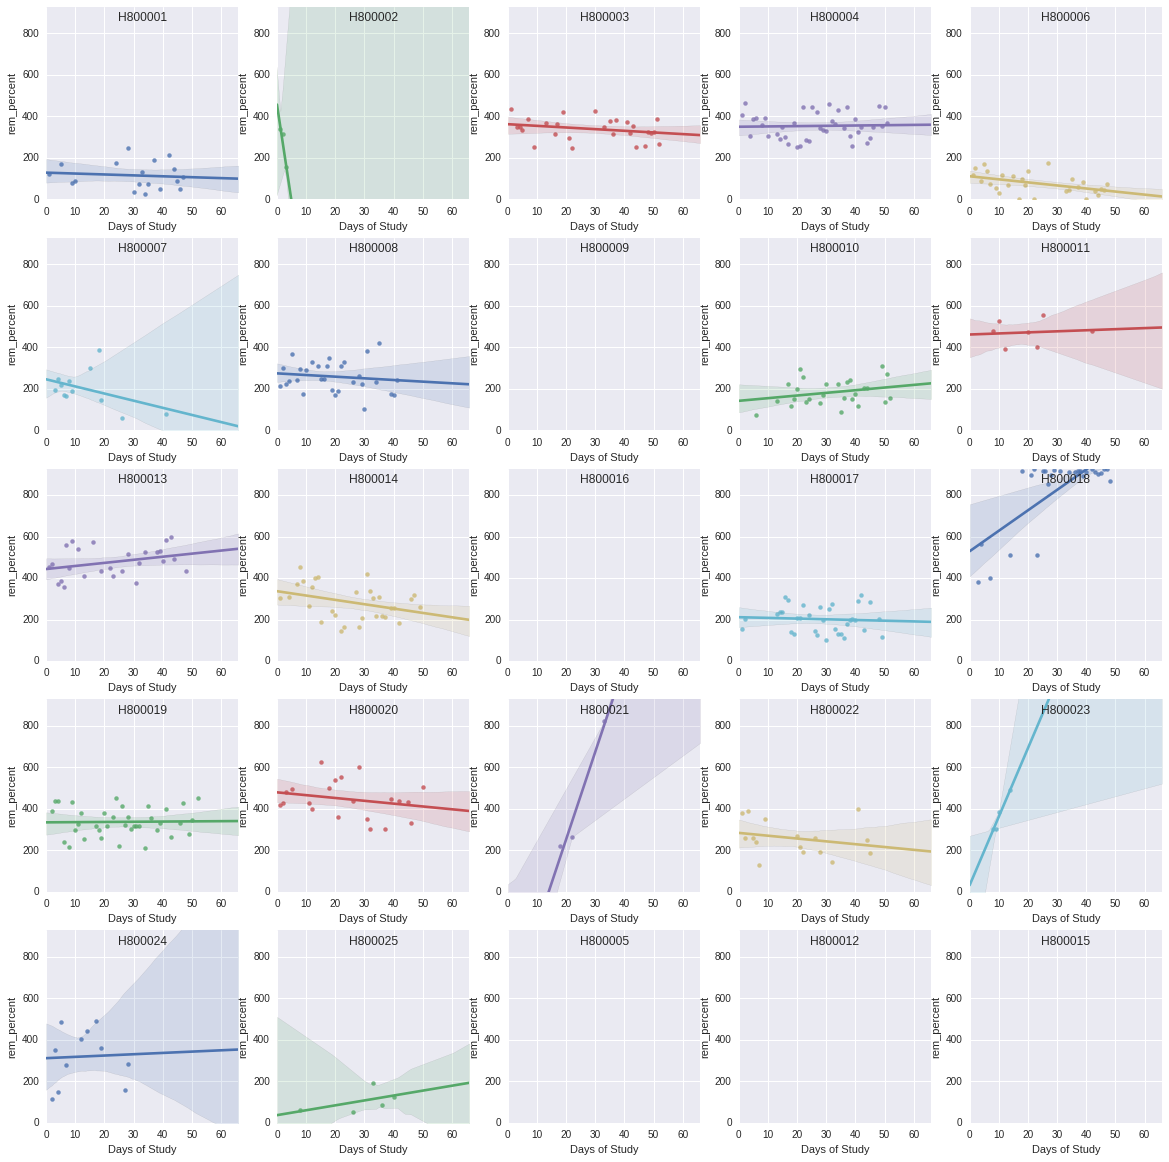

In [201]:
# rem_percent
feature = free_living_features_highly_correlated[8]
plot_feature_across_days(feature)

movement_rate


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


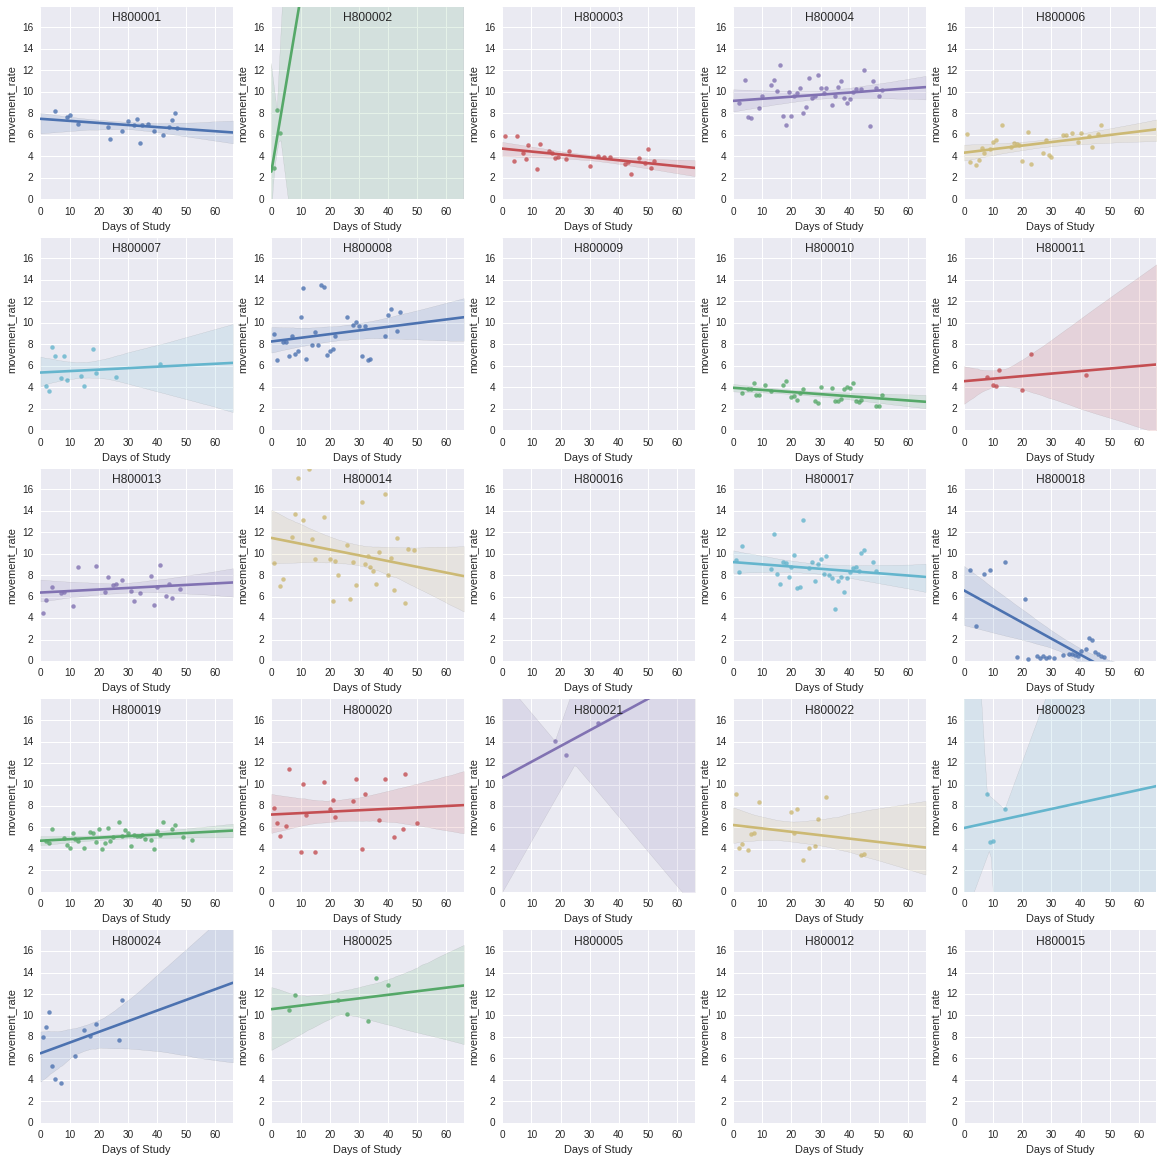

In [202]:
# movement_rate
feature = free_living_features_highly_correlated[9]
plot_feature_across_days(feature)

mean_pvt_delay_7_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


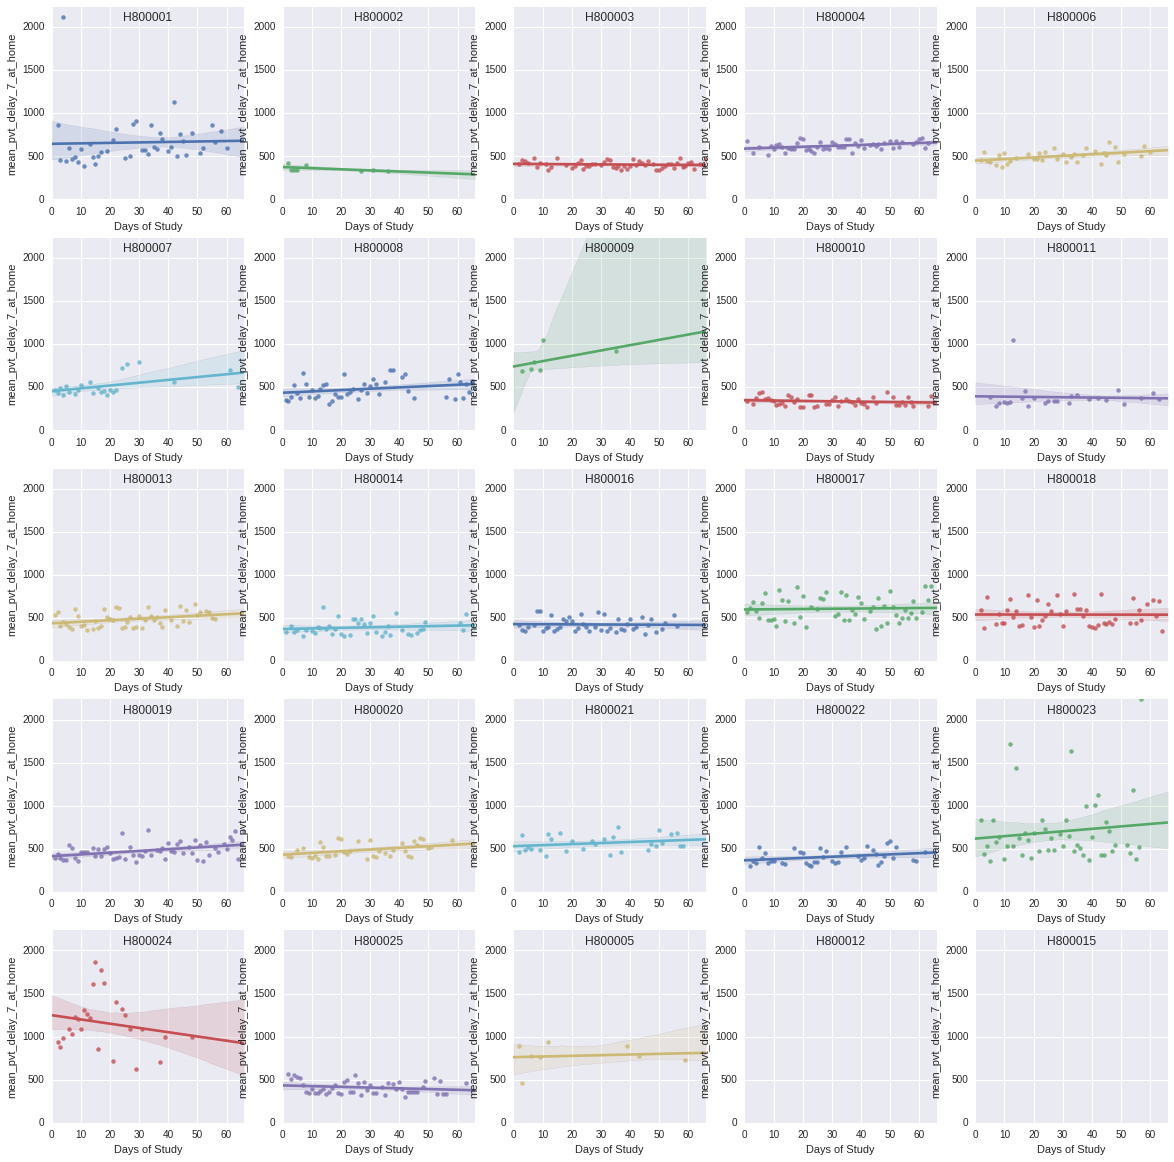

In [174]:
# mean_pvt_delay_7_at_home
feature = at_home_features_highly_correlated[0]
plot_feature_across_days(feature)

mobility_stance_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


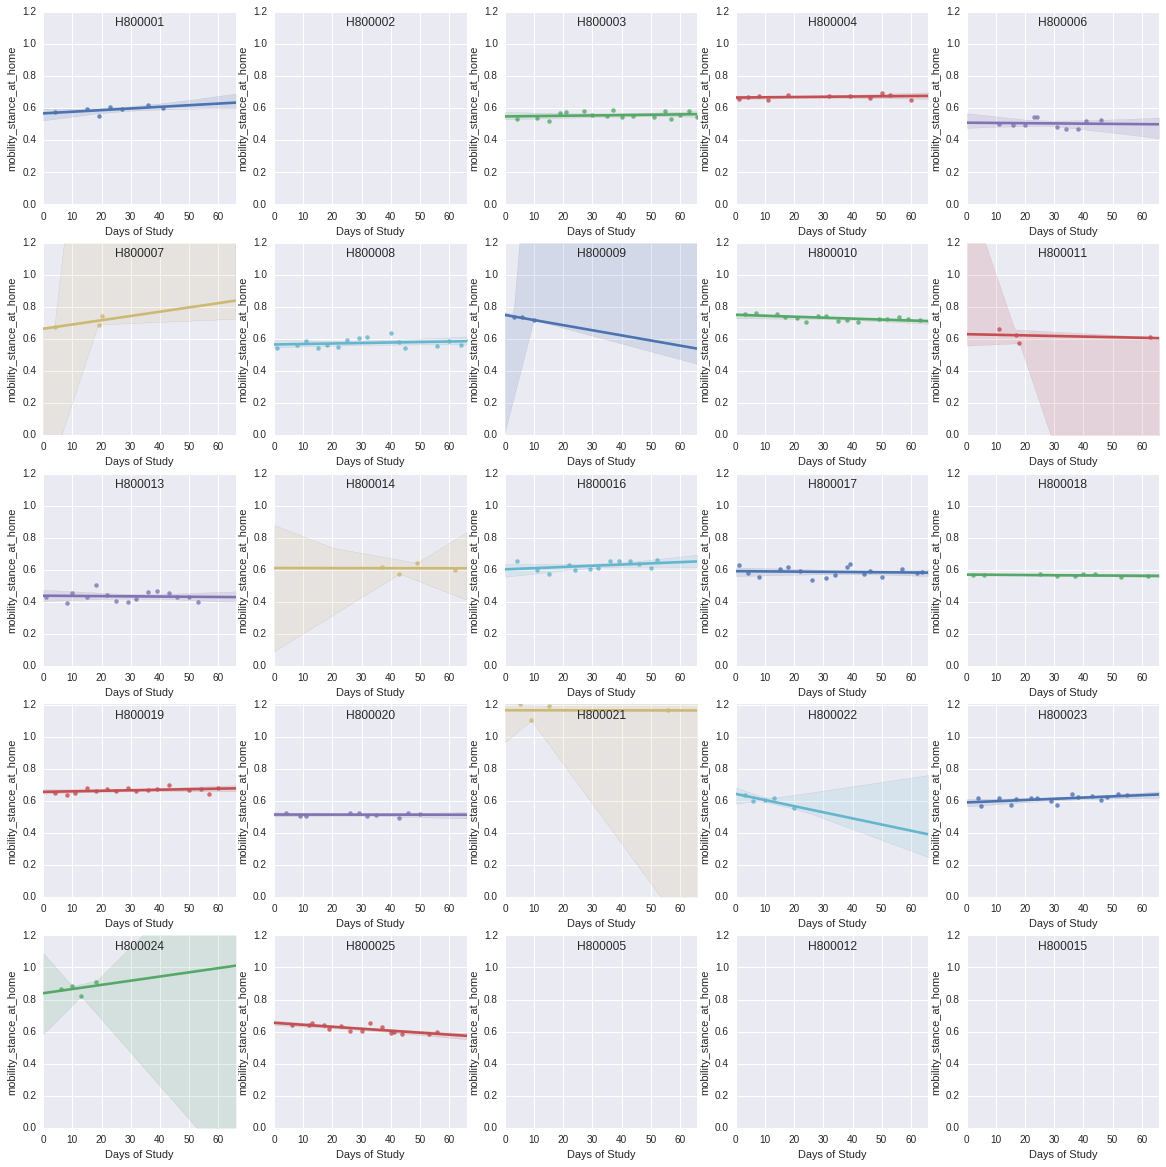

In [175]:
# mobility_stance_at_home
feature = at_home_features_highly_correlated[1]
plot_feature_across_days(feature)

mean_pvt_delay_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


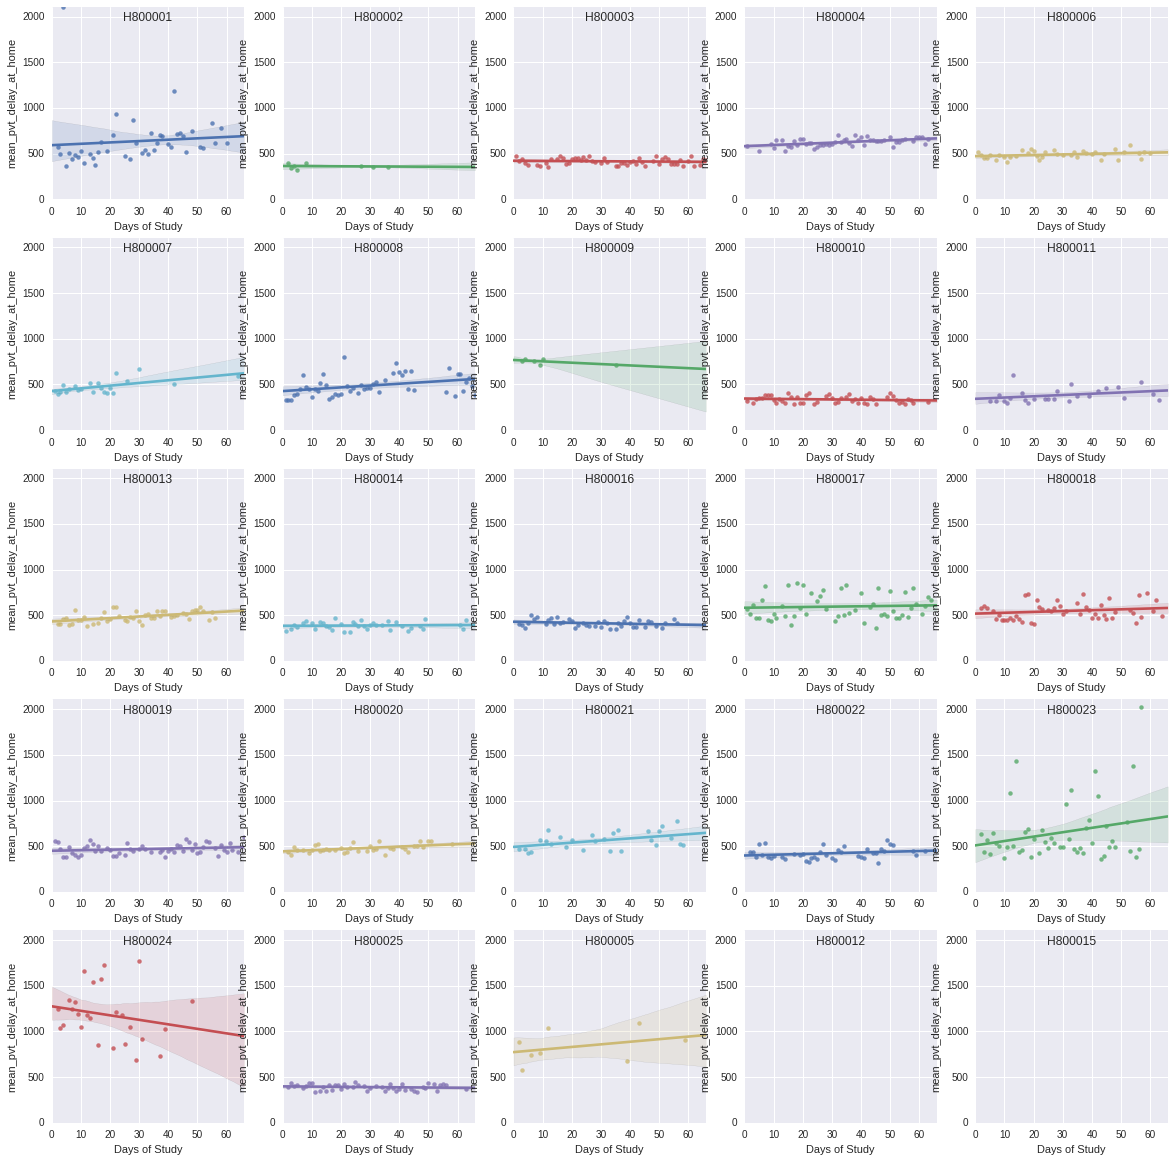

In [176]:
# mean_pvt_delay_at_home
feature = at_home_features_highly_correlated[2]
plot_feature_across_days(feature)

pq_nondominant_rhythm_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


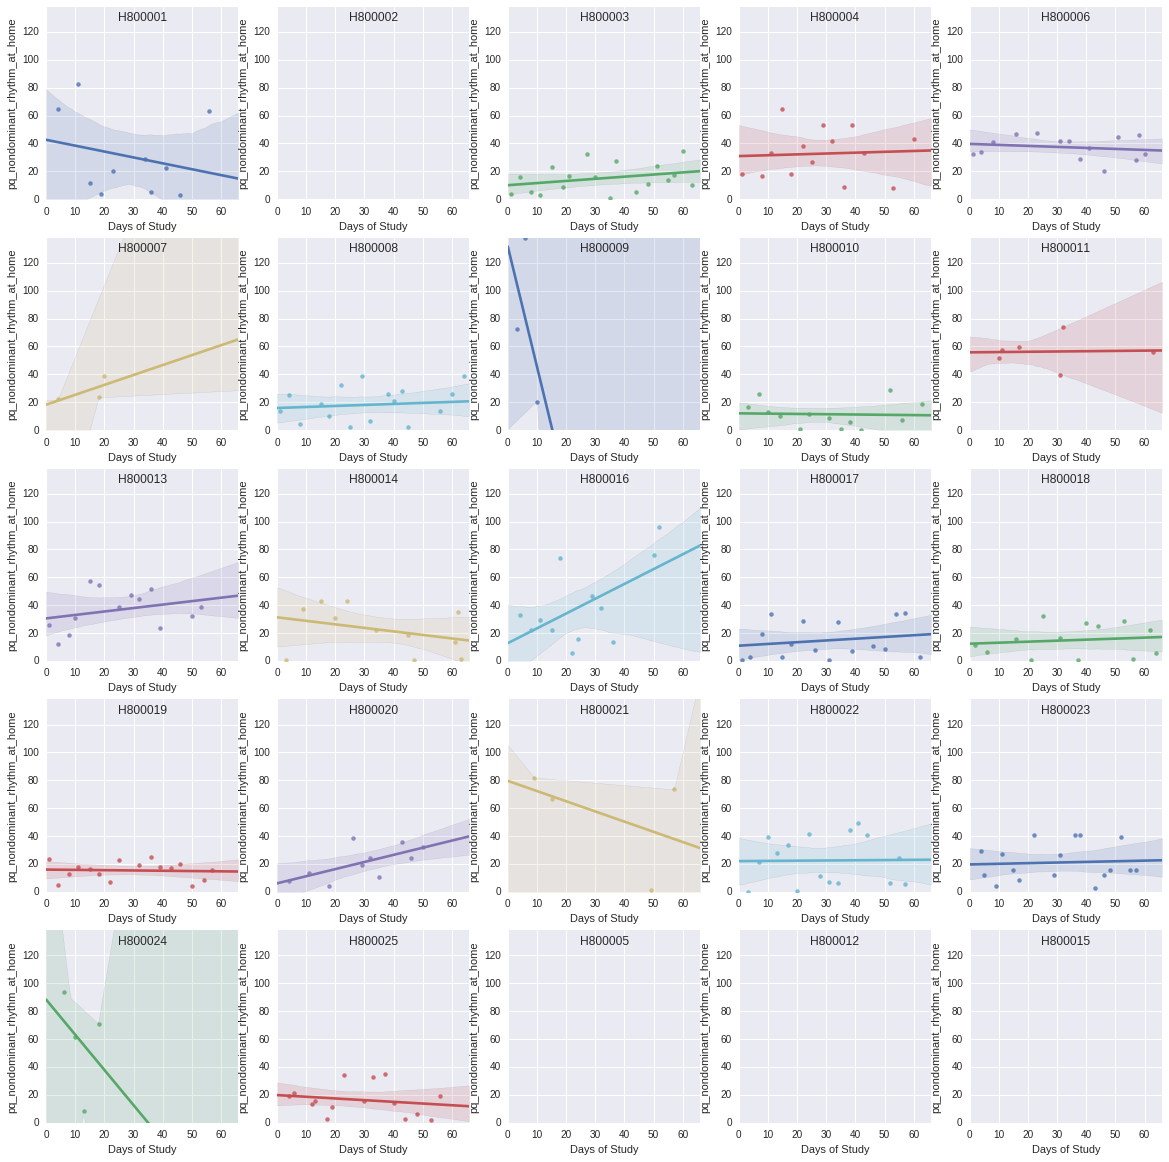

In [177]:
# pq_nondominant_rhythm_at_home
feature = at_home_features_highly_correlated[3]
plot_feature_across_days(feature)

pq_nondominant_median_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


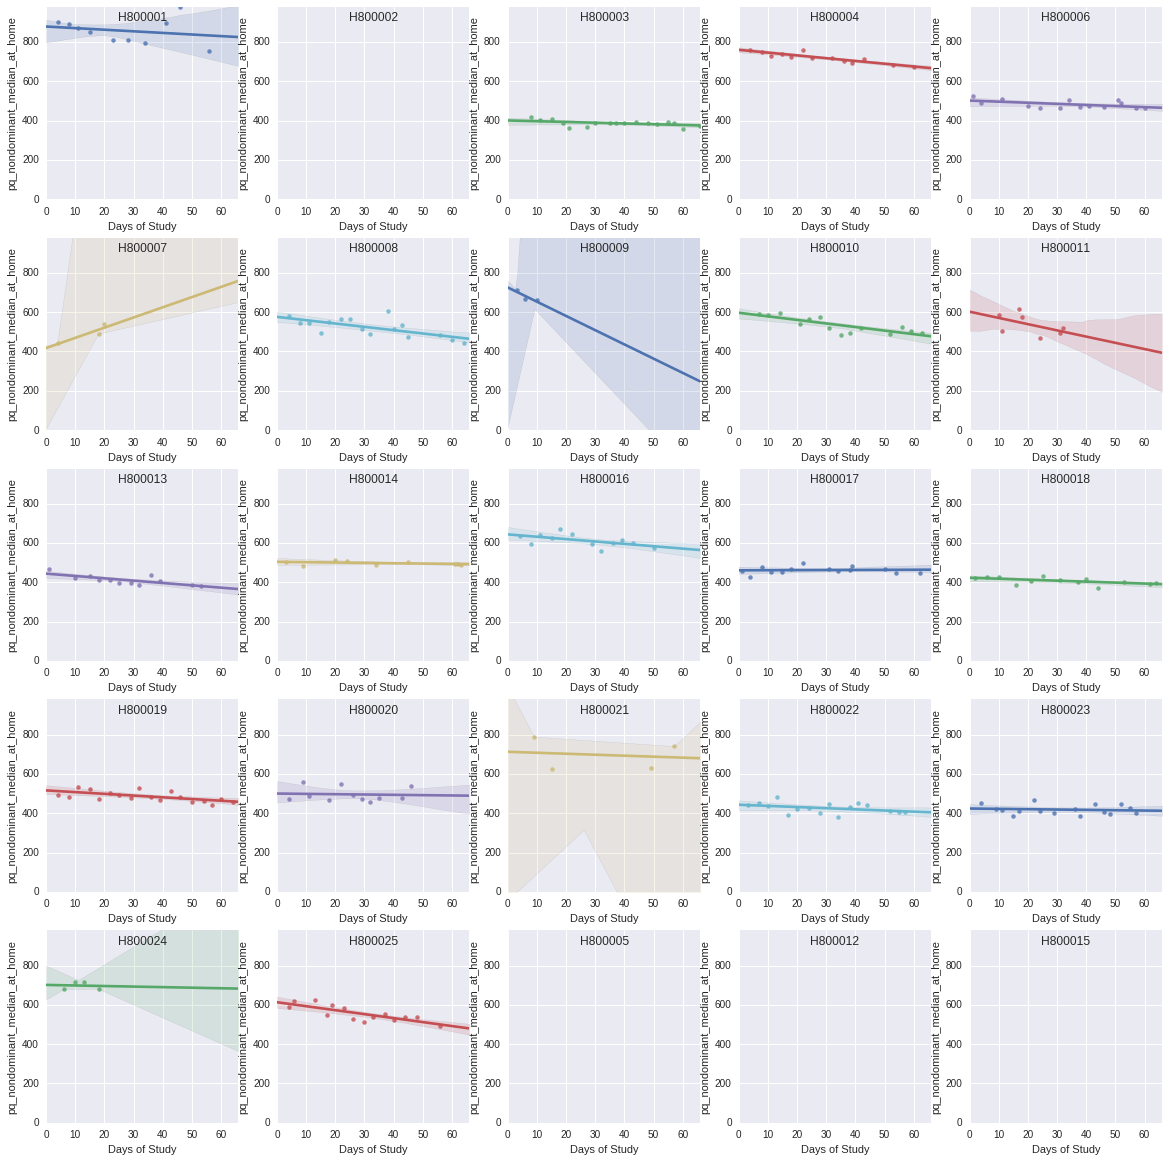

In [178]:
# pq_nondominant_median_at_home
feature = at_home_features_highly_correlated[4]
plot_feature_across_days(feature)

pq_dominant_rhythm_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


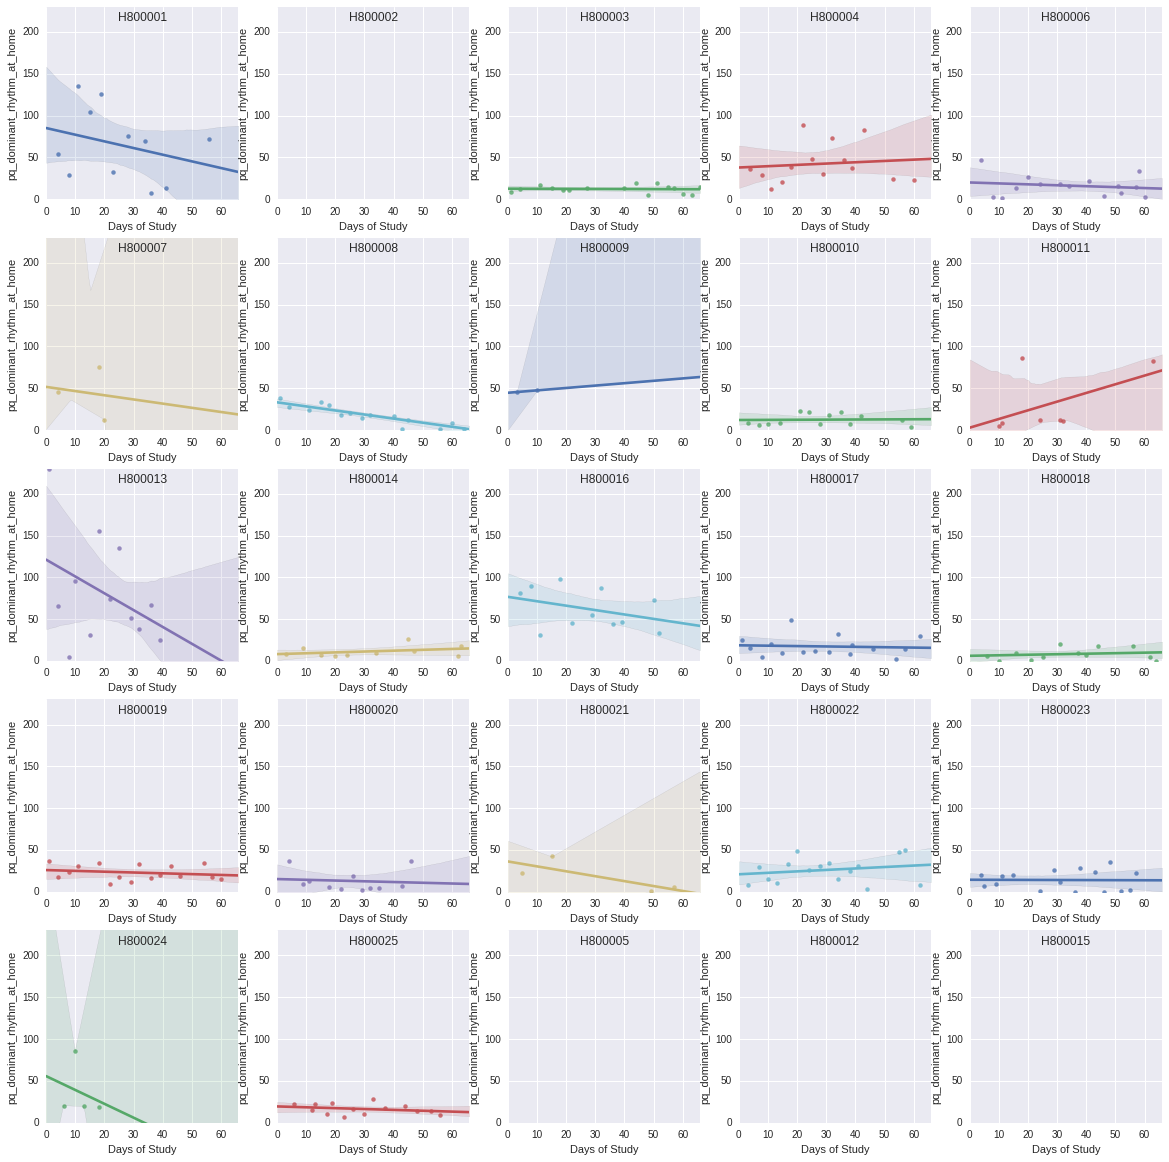

In [179]:
# pq_dominant_rhythm_at_home
feature = at_home_features_highly_correlated[5]
plot_feature_across_days(feature)

turn_vel_max_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


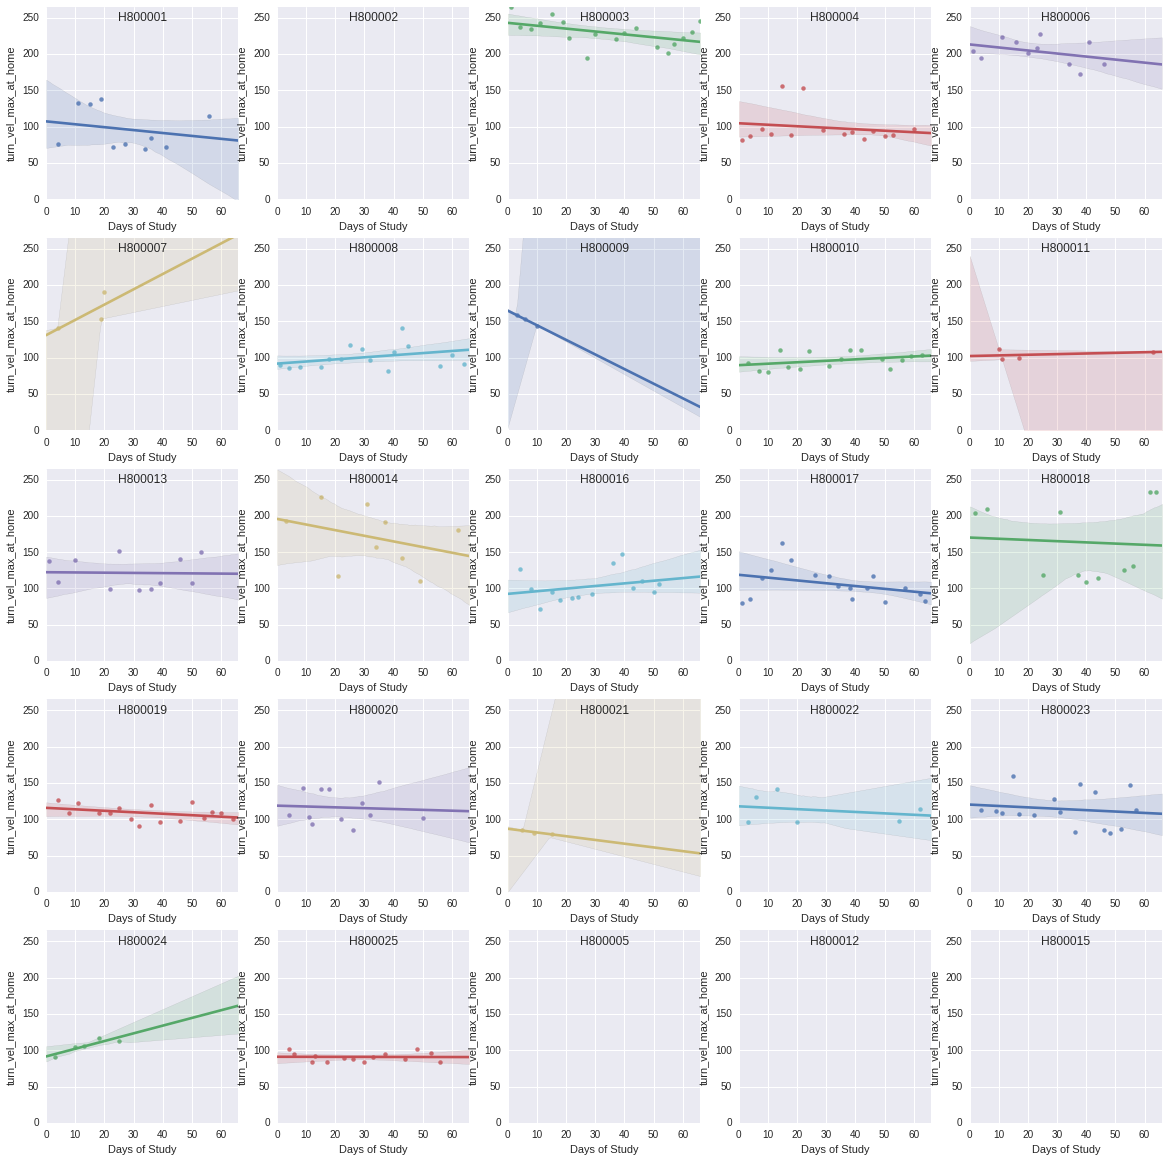

In [180]:
# turn_vel_max_at_home
feature = at_home_features_highly_correlated[6]
plot_feature_across_days(feature)

mobility_swing_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


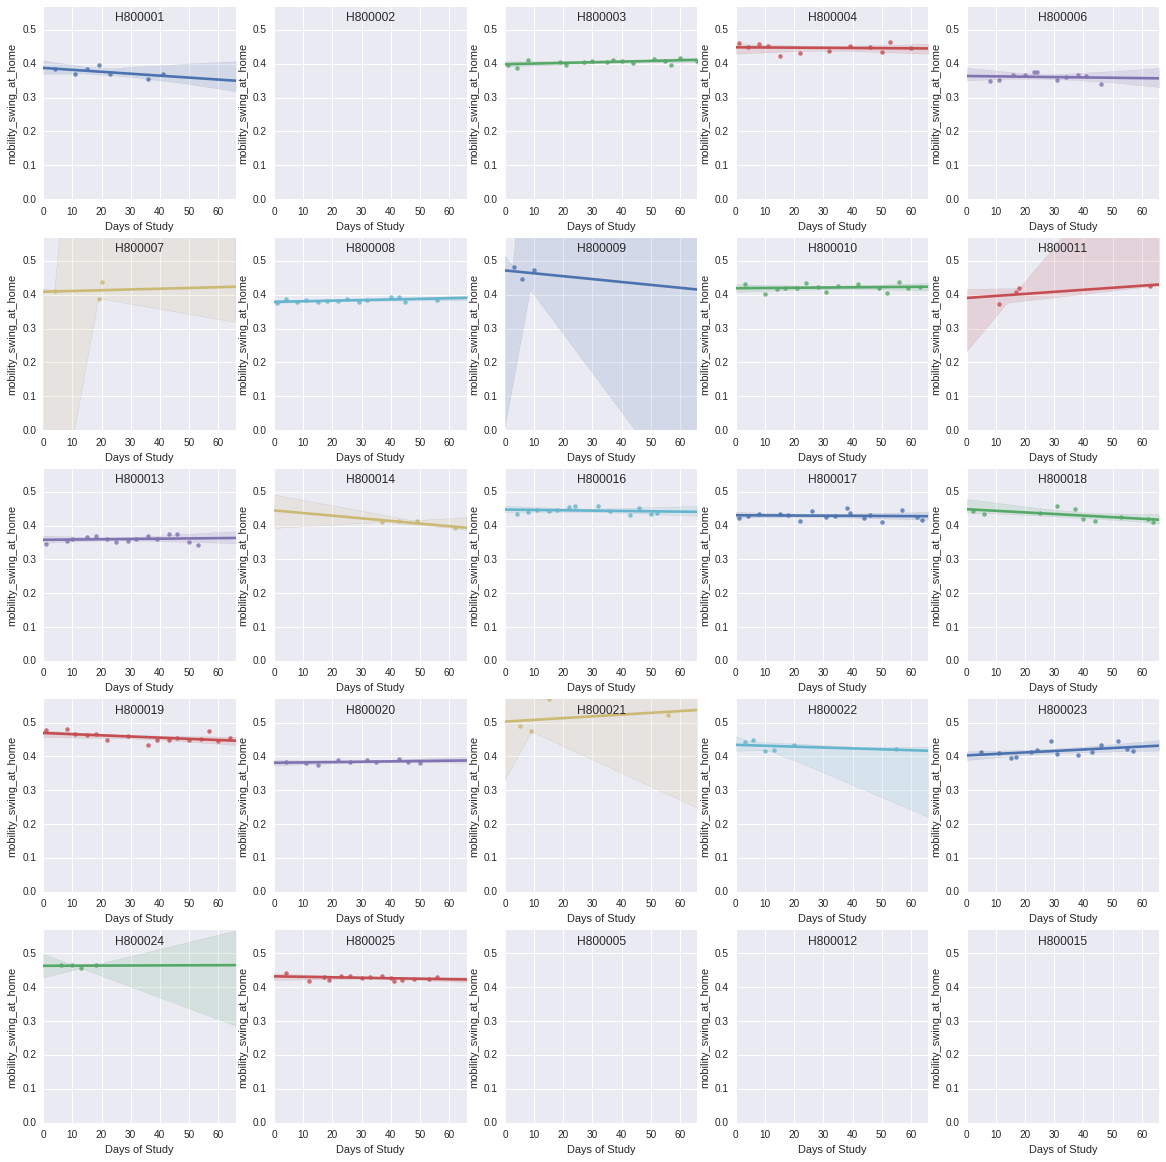

In [181]:
# mobility_swing_at_home
feature = at_home_features_highly_correlated[7]
plot_feature_across_days(feature)

zx_dominant_num_correct_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


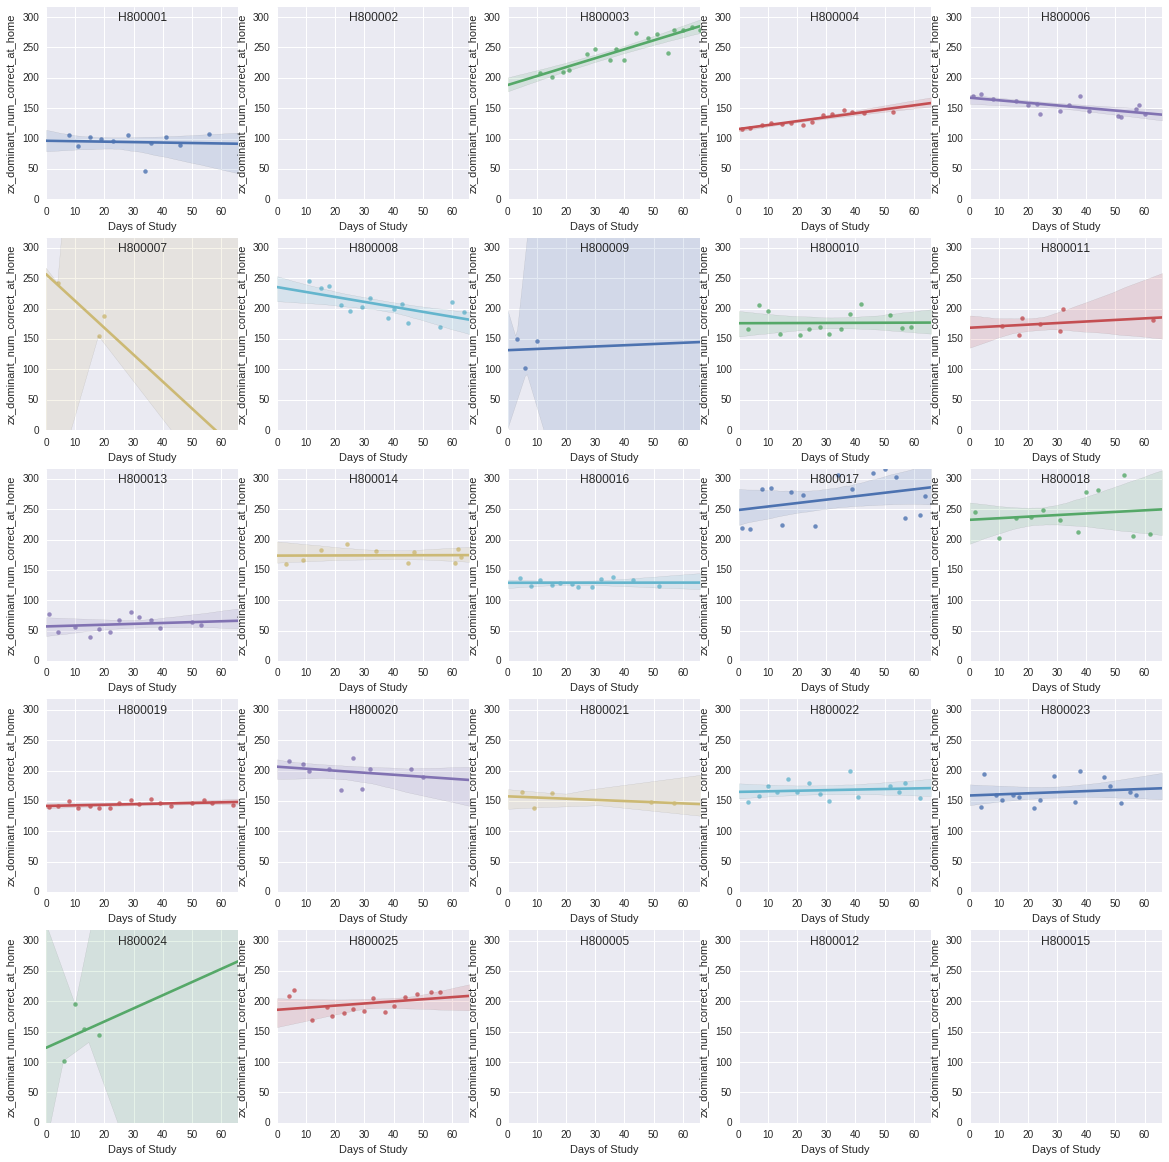

In [182]:
# zx_dominant_num_correct_at_home
feature = at_home_features_highly_correlated[8]
plot_feature_across_days(feature)

turn_vel_std_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


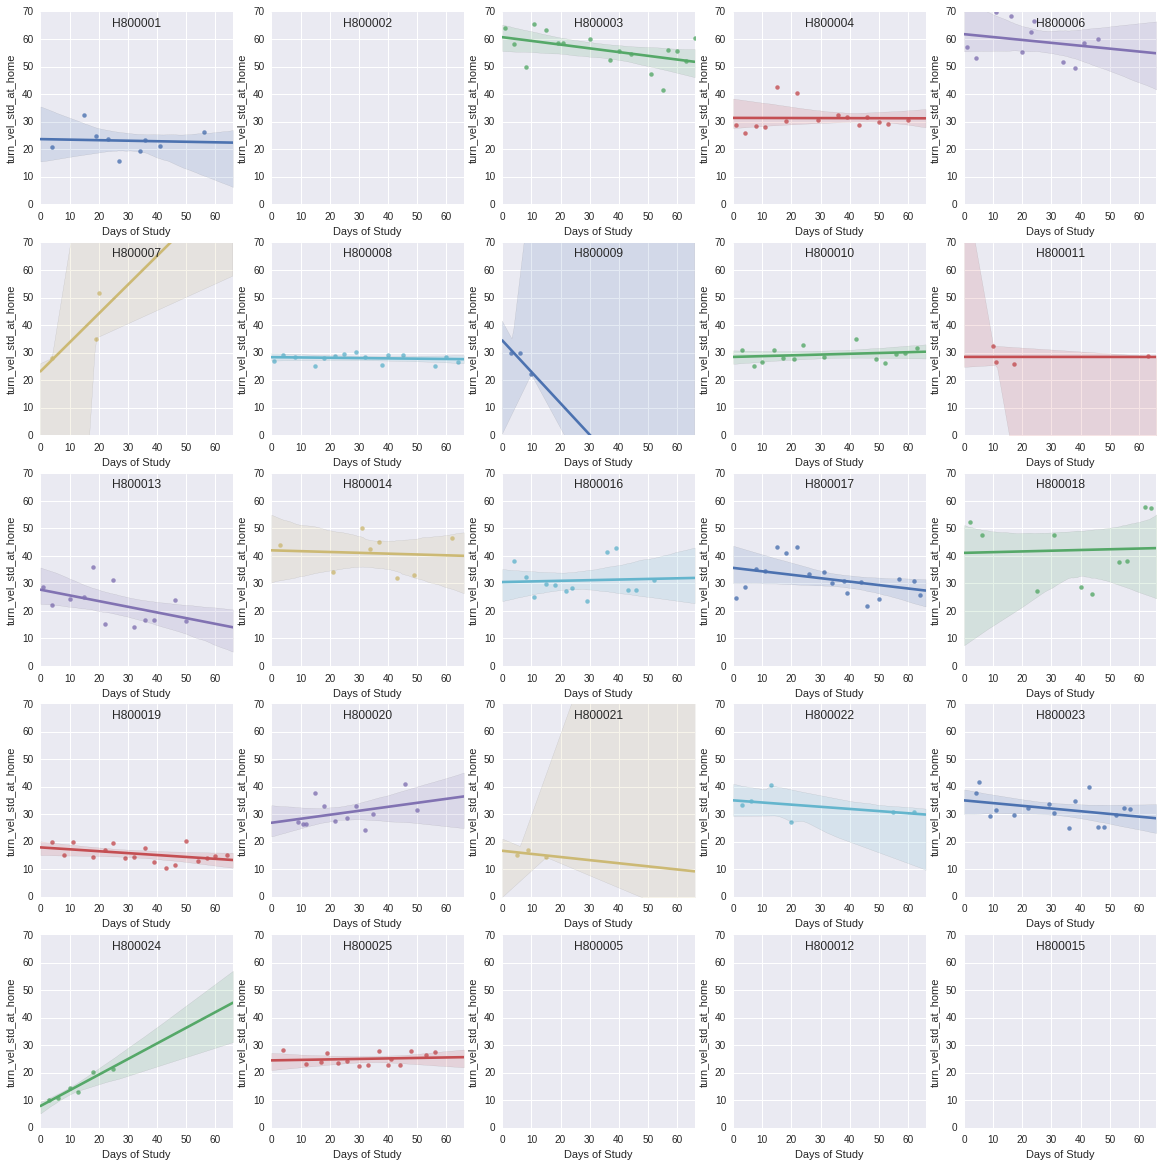

In [183]:
# turn_vel_std_at_home
feature = at_home_features_highly_correlated[9]
plot_feature_across_days(feature)

turn_duration_ankle_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


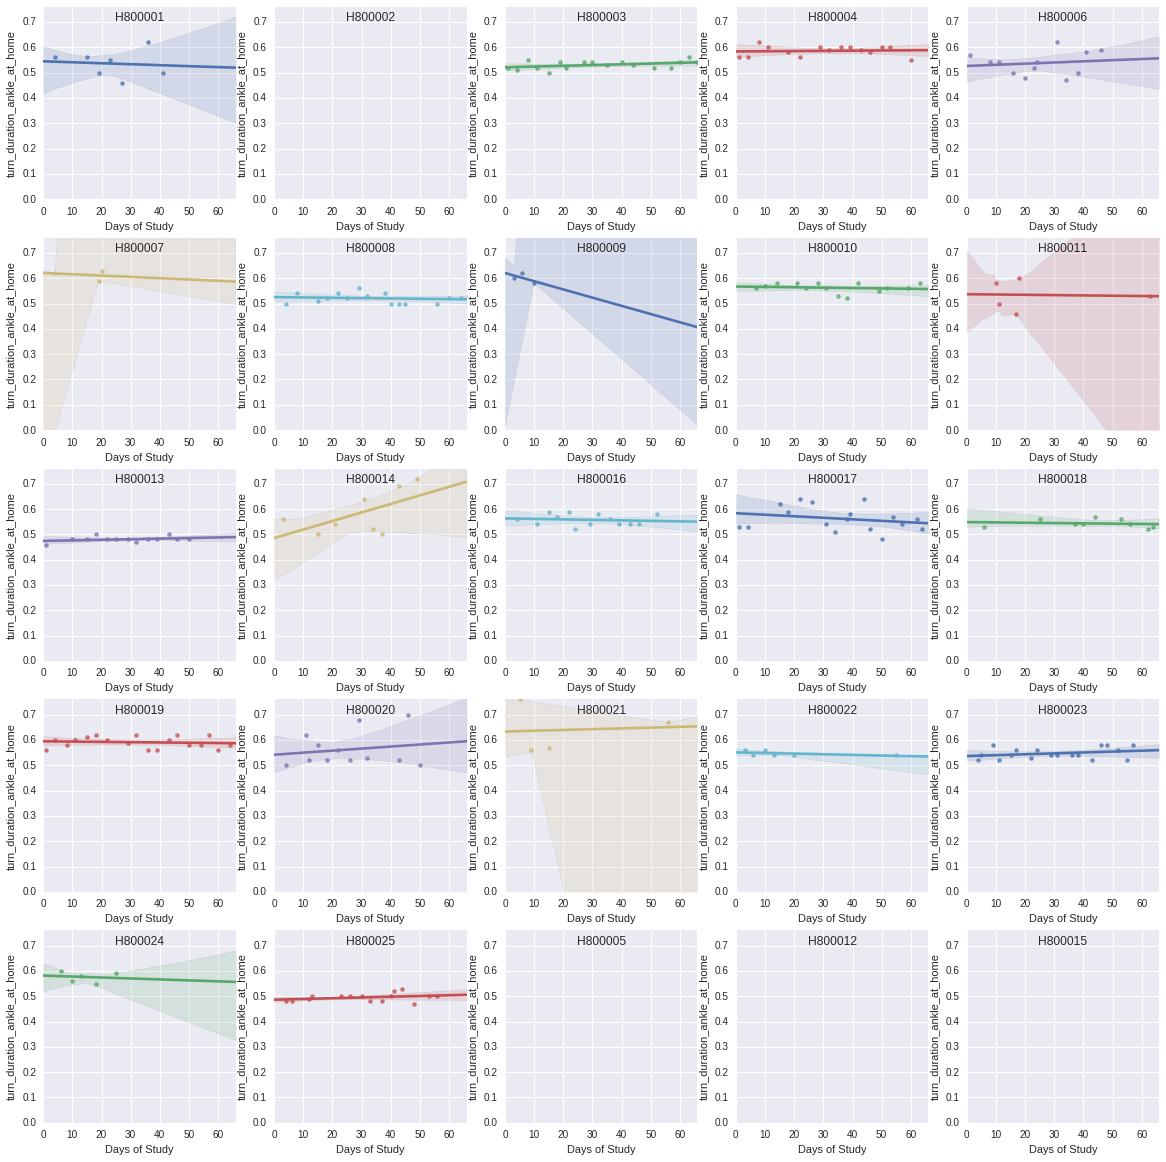

In [184]:
# turn_duration_ankle_at_home
feature = at_home_features_highly_correlated[10]
plot_feature_across_days(feature)

turn_vel_max_ankle_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


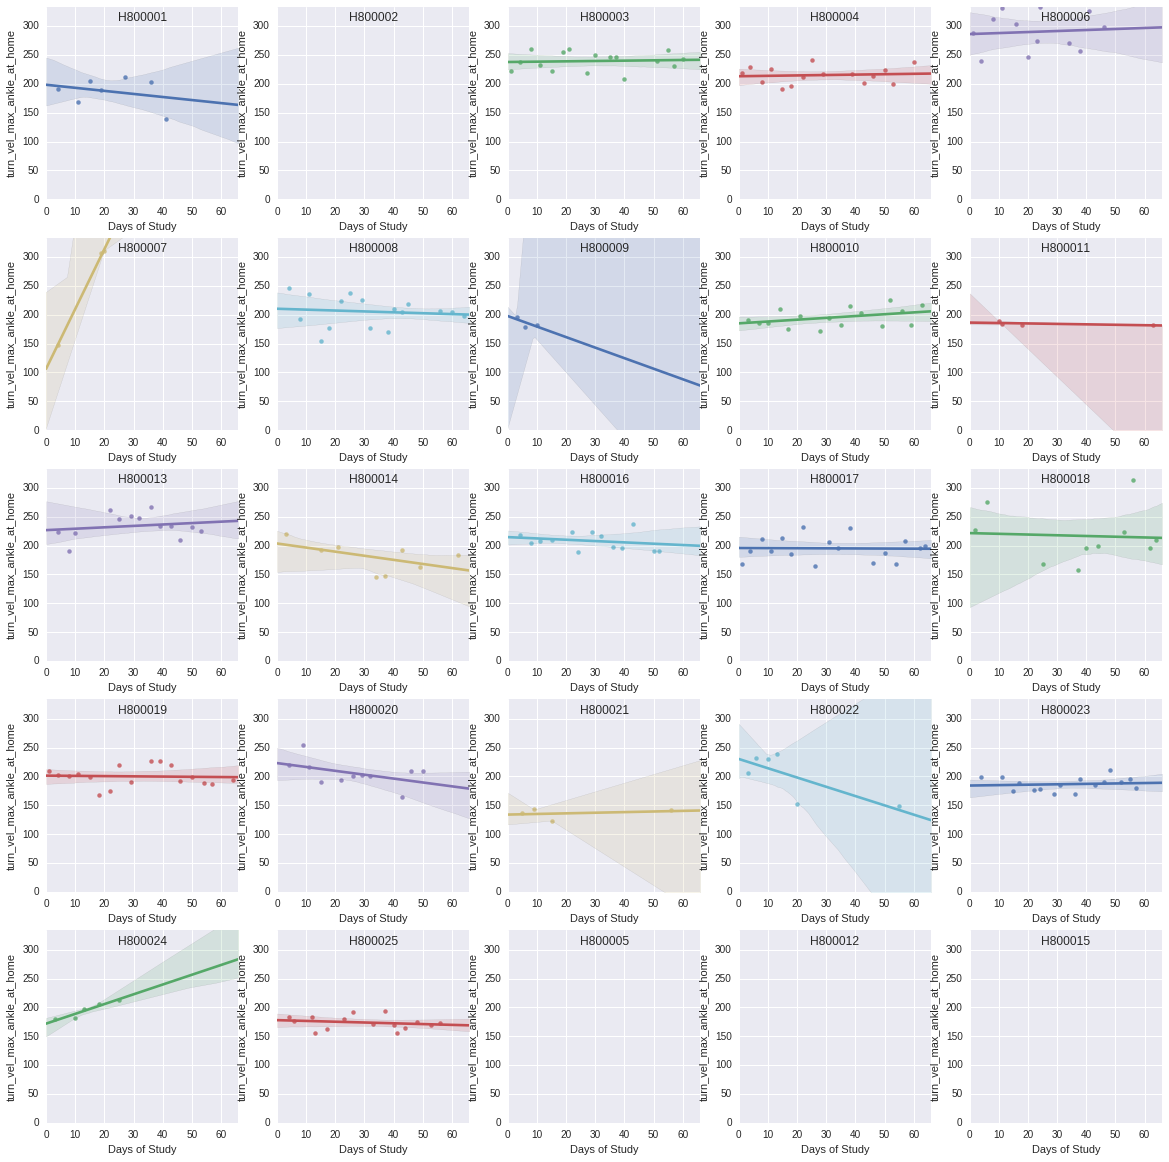

In [185]:
# turn_vel_max_ankle_at_home
feature = at_home_features_highly_correlated[11]
plot_feature_across_days(feature)

mean_pvt_delay_5_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


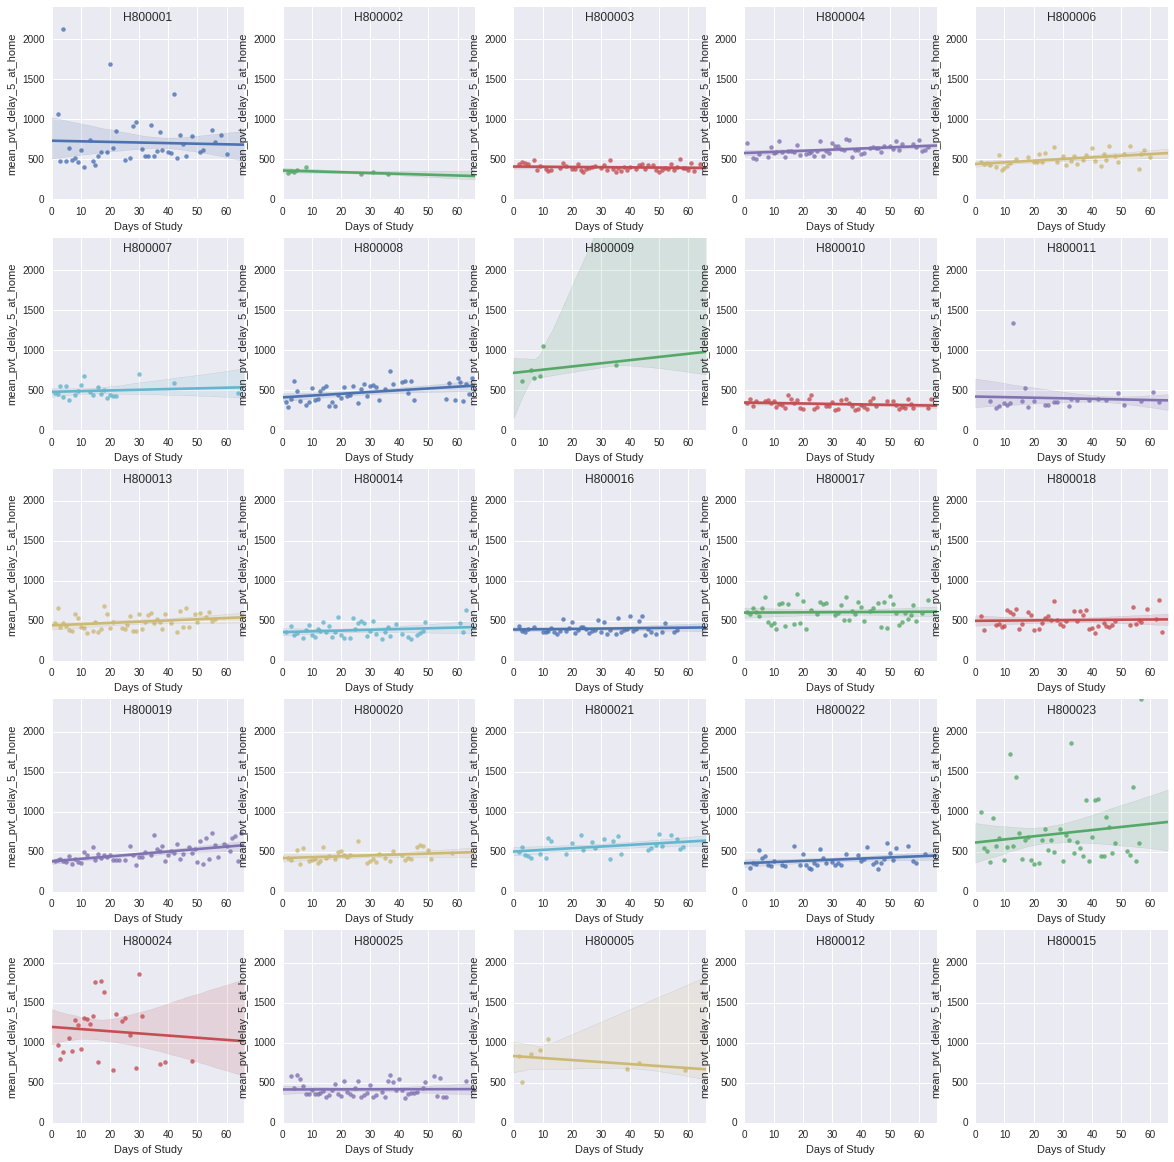

In [186]:
# mean_pvt_delay_5_at_home
feature = at_home_features_highly_correlated[12]
plot_feature_across_days(feature)

zx_nondominant_median_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


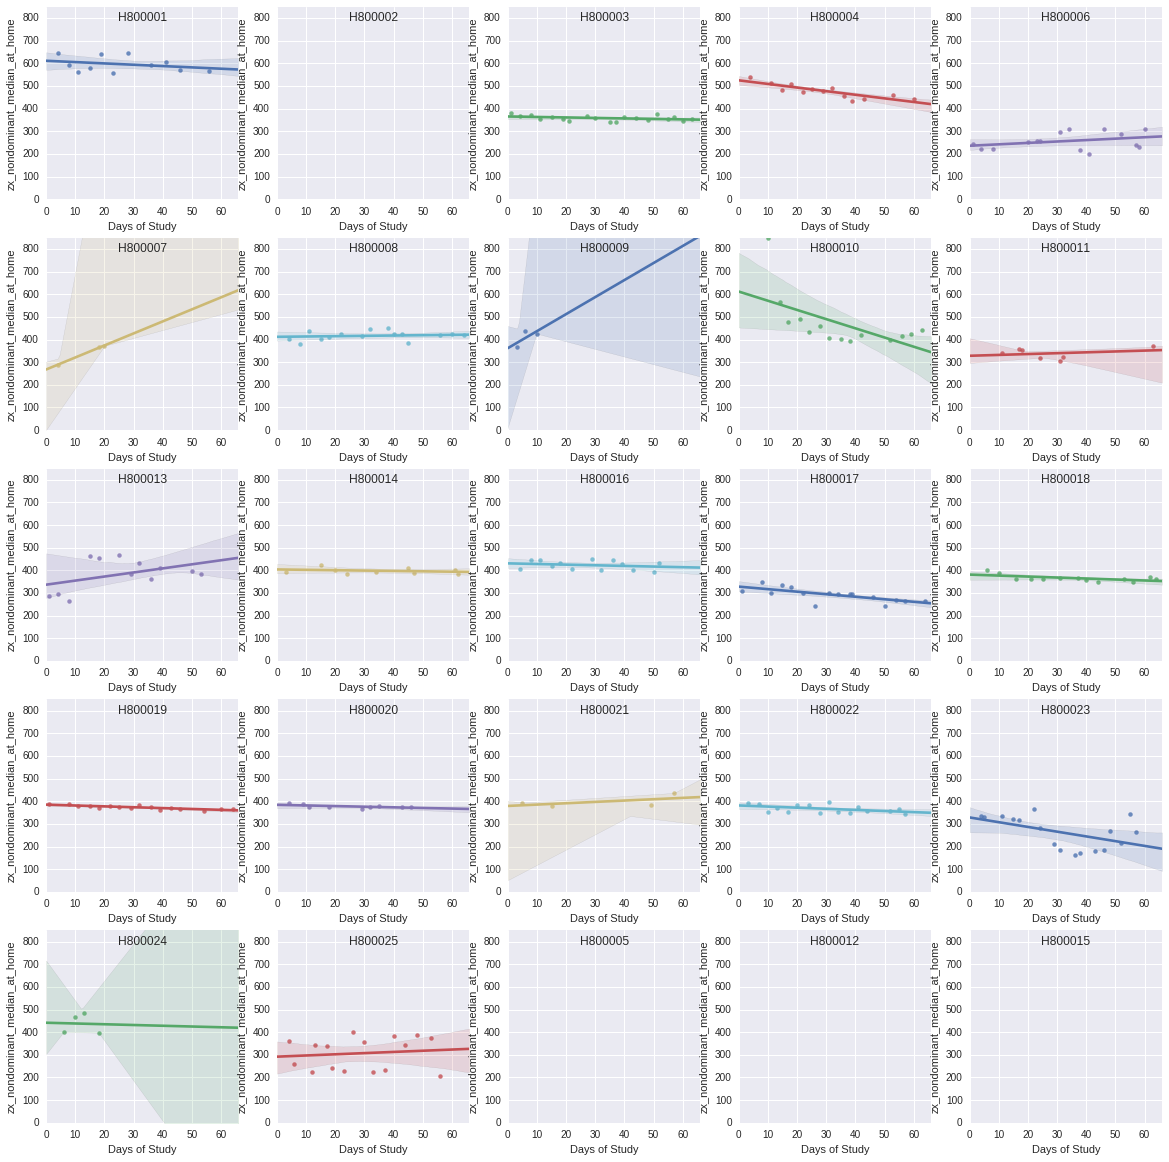

In [187]:
# zx_nondominant_median_at_home
feature = at_home_features_highly_correlated[13]
plot_feature_across_days(feature)

zx_nondominant_num_correct_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


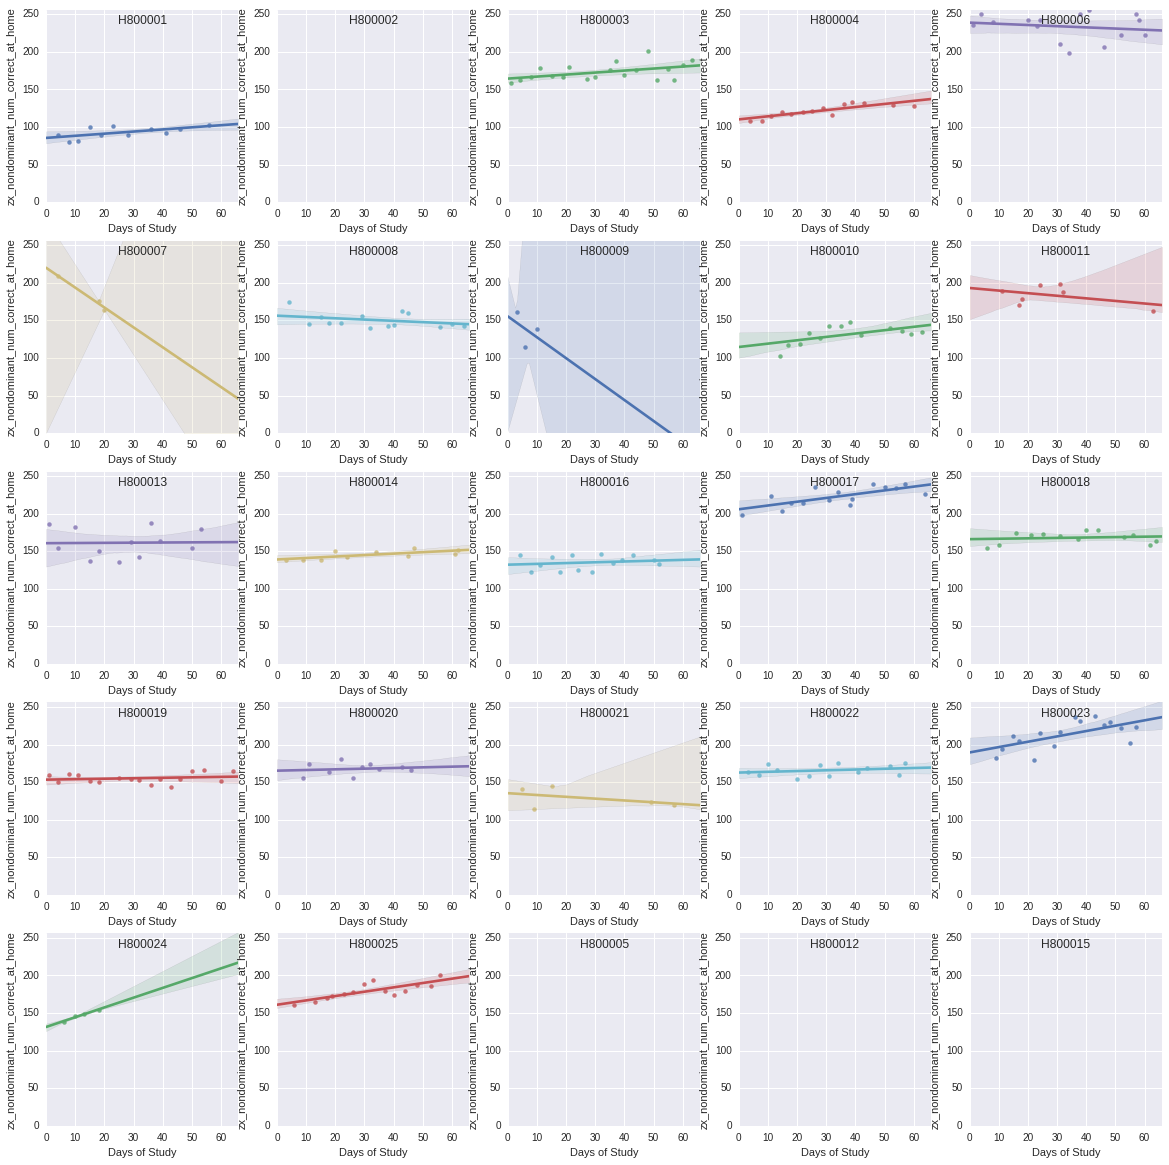

In [188]:
# zx_nondominant_num_correct_at_home
feature = at_home_features_highly_correlated[14]
plot_feature_across_days(feature)

mean_pvt_delay_3_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


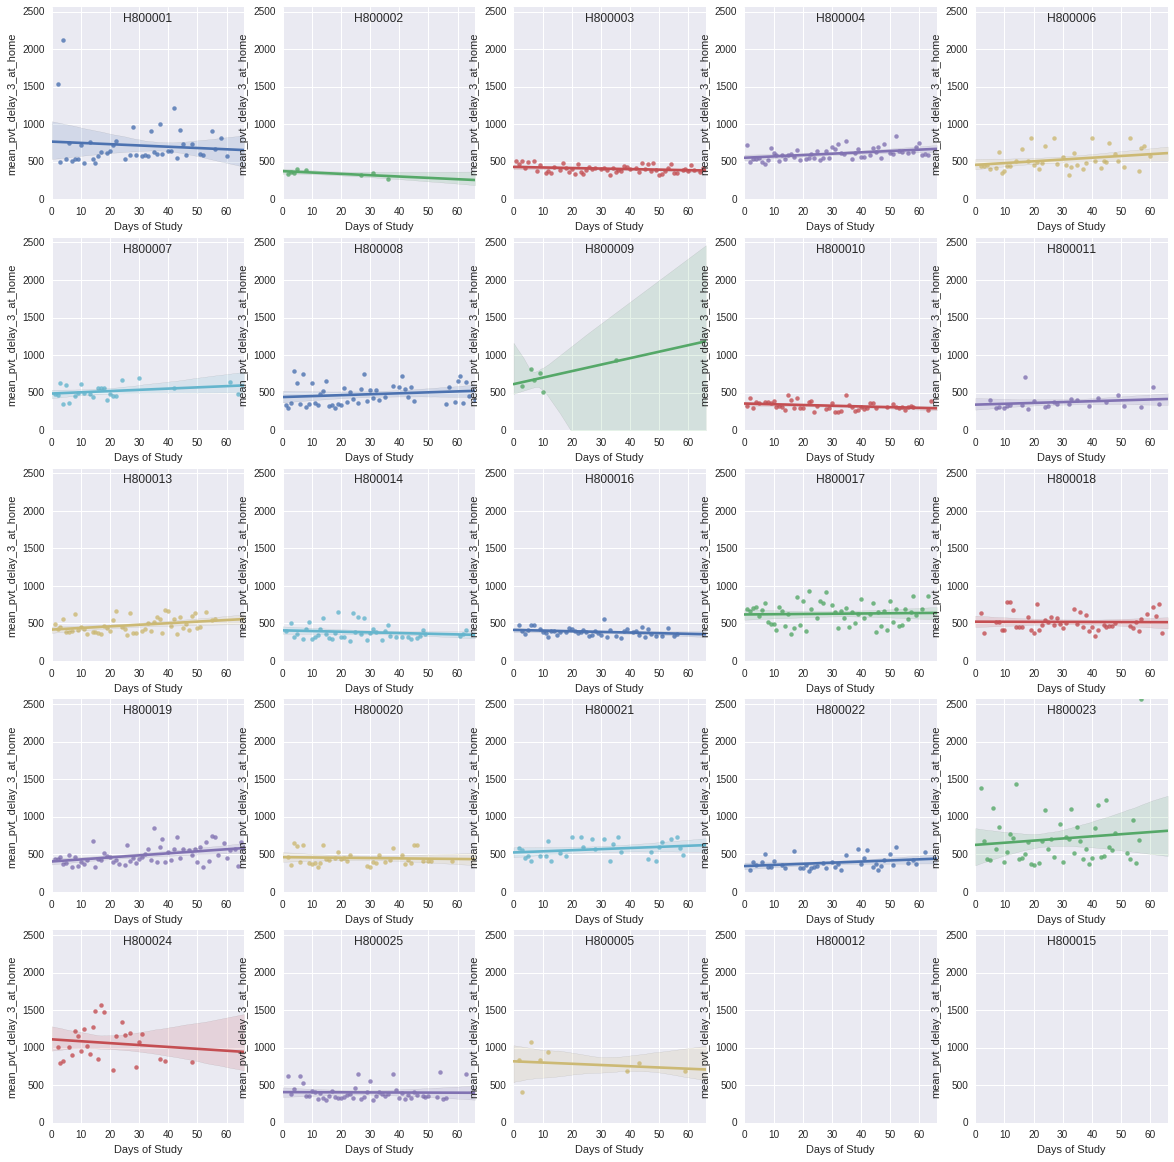

In [189]:
# mean_pvt_delay_3_at_home
feature = at_home_features_highly_correlated[15]
plot_feature_across_days(feature)

turn_vel_std_ankle_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


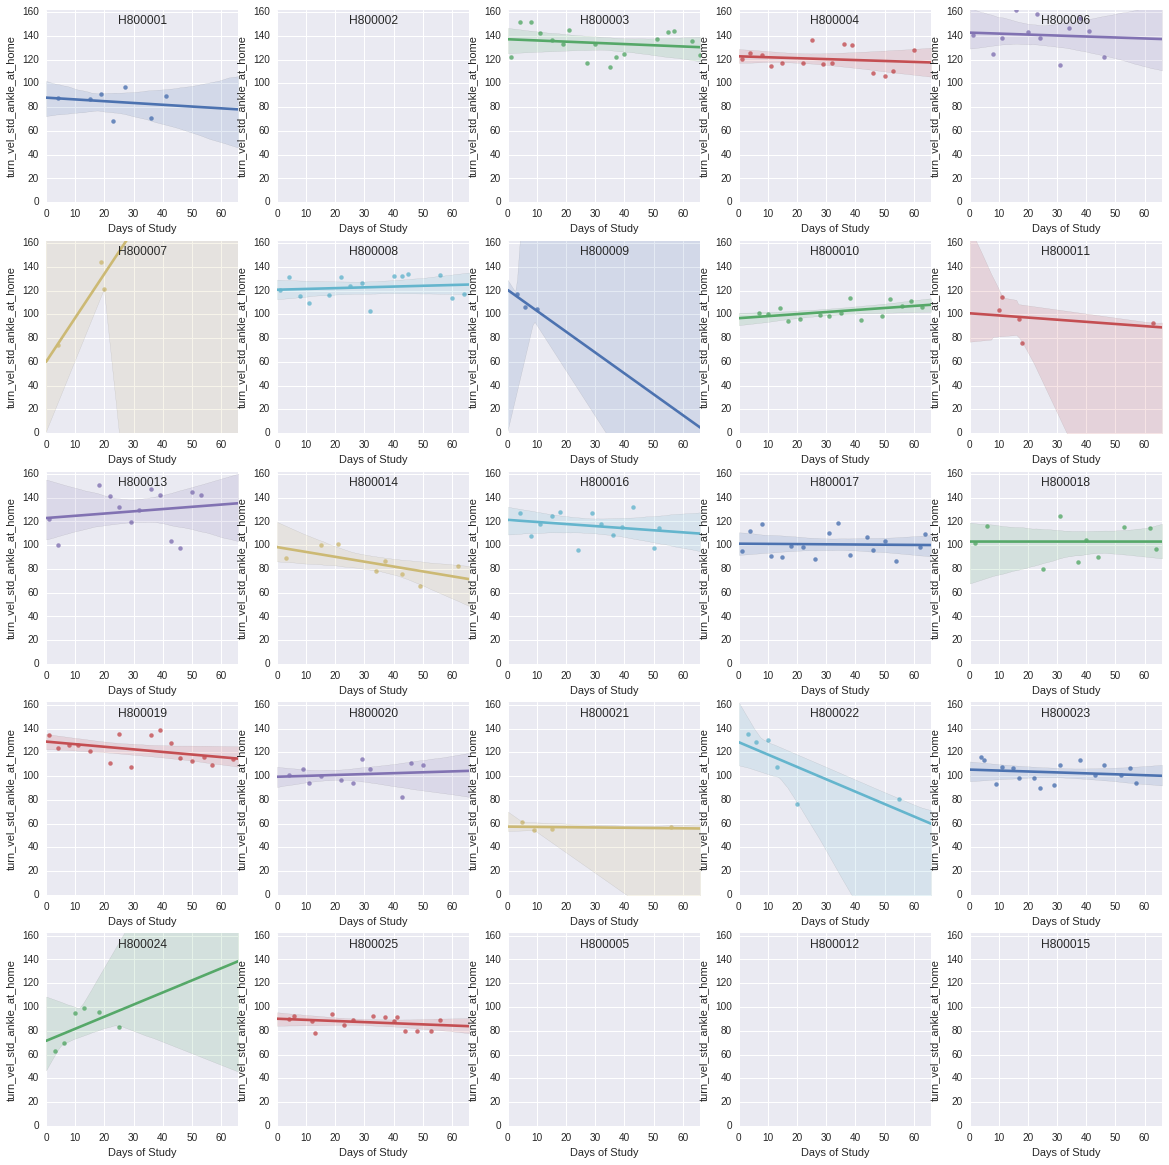

In [190]:
# turn_vel_std_ankle_at_home
feature = at_home_features_highly_correlated[16]
plot_feature_across_days(feature)

mobility_activity_at_home_time


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


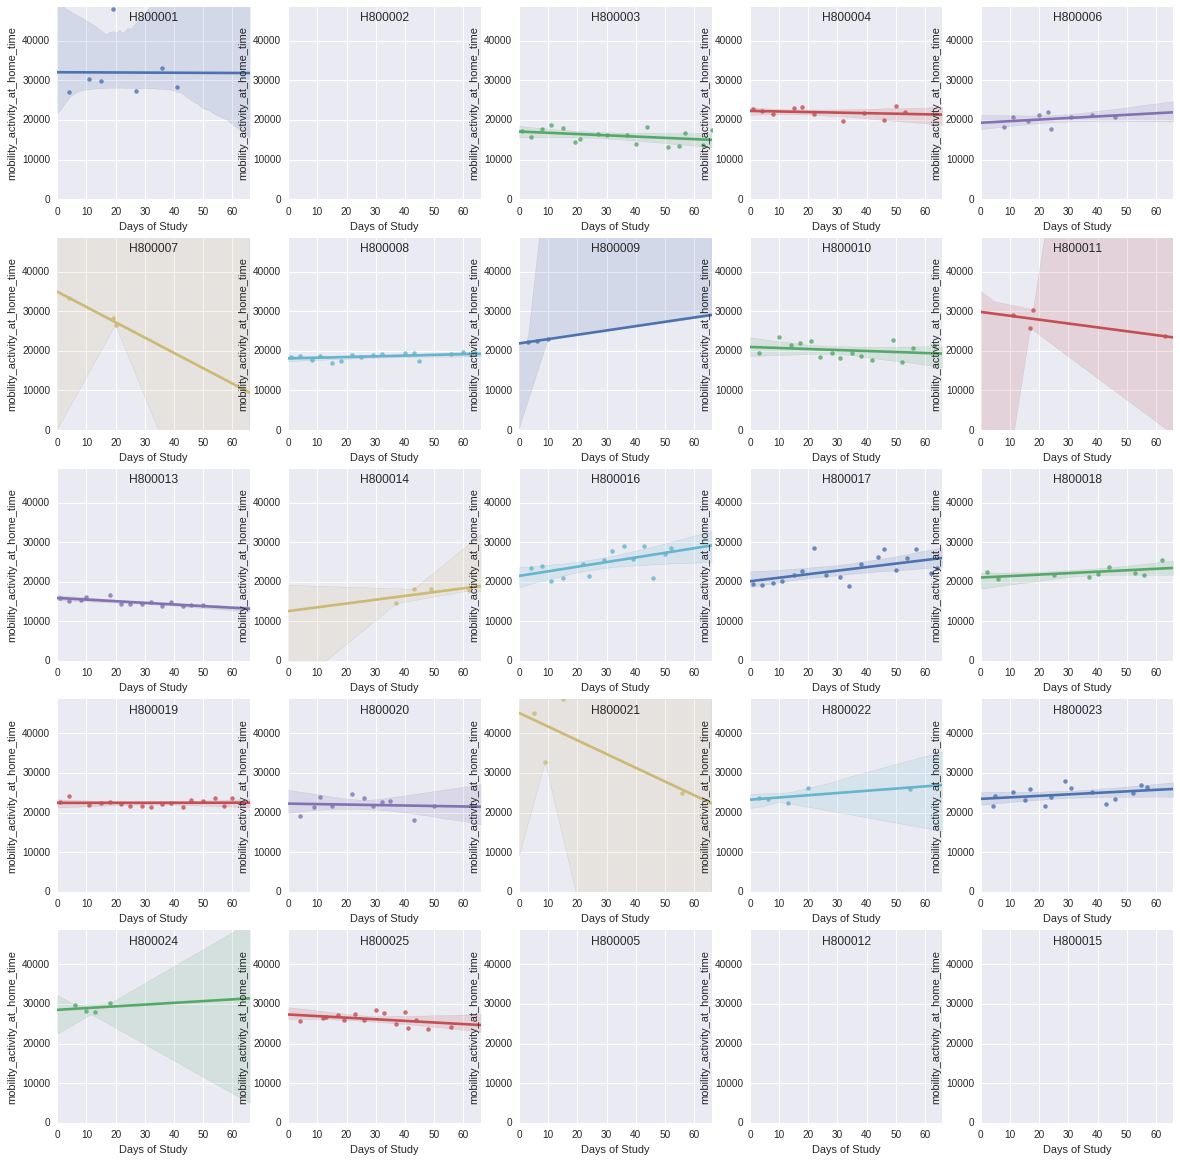

In [191]:
# mobility_activity_at_home_time
feature = at_home_features_highly_correlated[17]
plot_feature_across_days(feature)

mean_pvt_delay_1_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


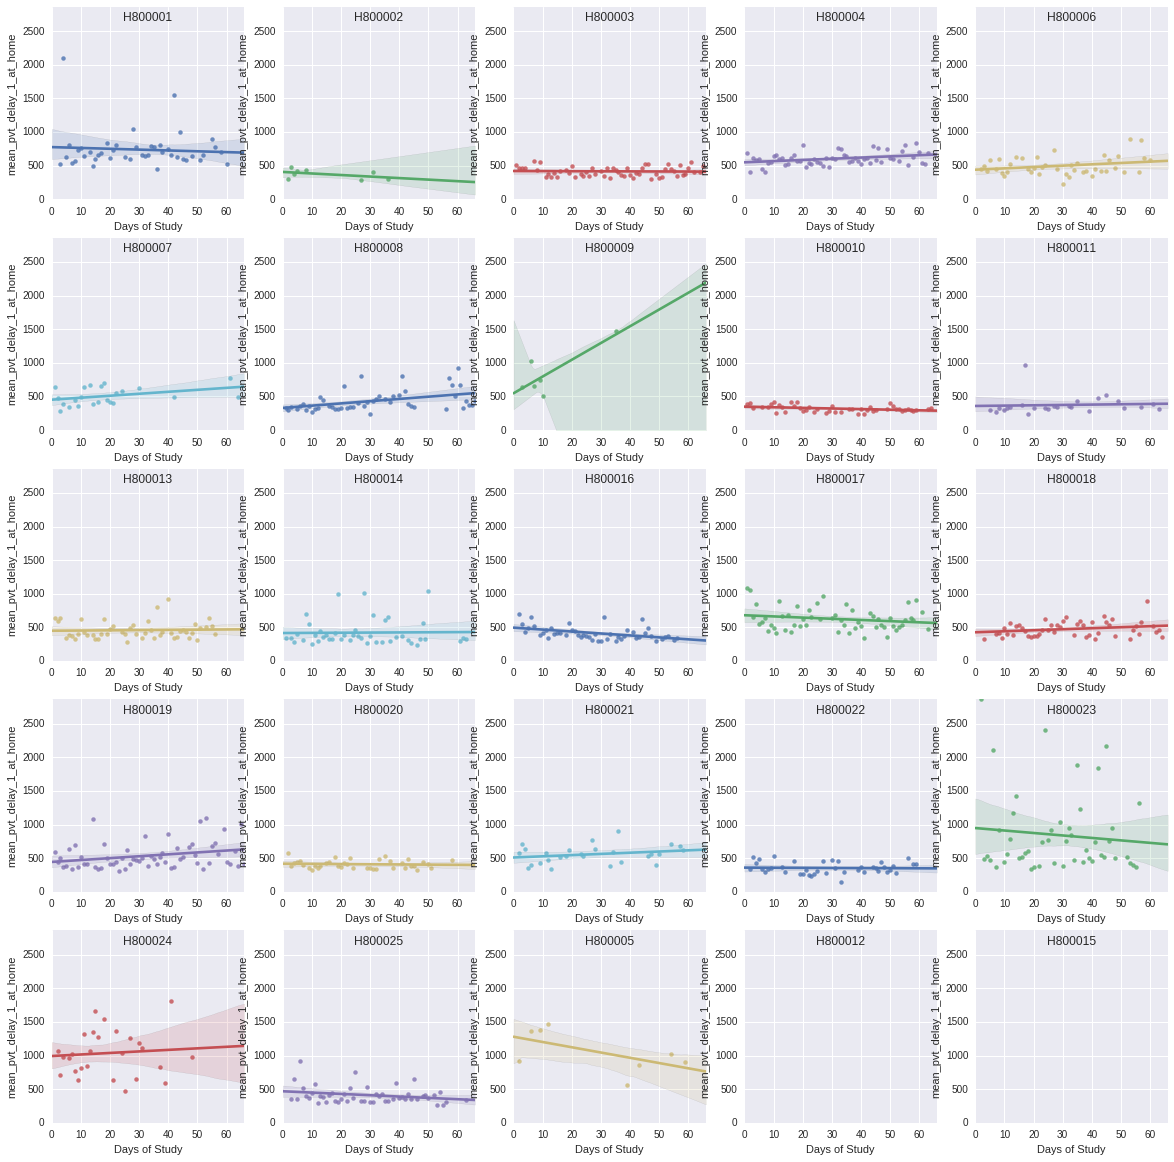

In [192]:
# mean_pvt_delay_1_at_home
feature = at_home_features_highly_correlated[18]
plot_feature_across_days(feature)